# TensorFlow & Keras 3.0: Tensor Operations from Zero to Hero

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo/tensorflow_tensor_operations_tutorial.ipynb)

---

## Welcome!

This notebook is your complete guide to **TensorFlow tensors and operations** - the fundamental building blocks of deep learning. We'll start from absolute basics and progressively build up to advanced operations used in modern neural networks.

### What You'll Learn

| Section | Topics |
|---------|--------|
| **Part 1** | What are tensors? Creation, data types, shapes |
| **Part 2** | Indexing, slicing, and reshaping |
| **Part 3** | Mathematical operations and broadcasting |
| **Part 4** | Linear algebra for deep learning |
| **Part 5** | Einstein summation (einsum) - the power tool |
| **Part 6** | Reduction operations and aggregations |
| **Part 7** | Common deep learning patterns |
| **Part 8** | Practical exercises and real-world examples |

### Prerequisites
- Basic Python knowledge
- Some familiarity with NumPy (helpful but not required)
- Curiosity to learn!

---

## Setup and Installation

In [1]:
# Install/upgrade TensorFlow to latest version
!pip install --upgrade tensorflow -q

# For visualizations
!pip install matplotlib seaborn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 33.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check versions
print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")

# Check for GPU
print(f"\nGPU Available: {tf.config.list_physical_devices('GPU')}")

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

TensorFlow version: 2.20.0
NumPy version: 2.0.2

GPU Available: []


---

# Part 1: Introduction to Tensors

## What is a Tensor?

A **tensor** is a multi-dimensional array - a generalization of scalars, vectors, and matrices to higher dimensions.

```
Scalar (0D tensor):  5                    → Shape: ()
Vector (1D tensor):  [1, 2, 3]            → Shape: (3,)
Matrix (2D tensor):  [[1,2], [3,4]]       → Shape: (2, 2)
3D tensor:           [[[1,2], [3,4]],
                      [[5,6], [7,8]]]     → Shape: (2, 2, 2)
```

### Why Tensors?
- **Images**: 4D tensors `(batch, height, width, channels)`
- **Text sequences**: 3D tensors `(batch, sequence_length, features)`
- **Videos**: 5D tensors `(batch, frames, height, width, channels)`

---

## 1.1 Creating Tensors

Let's explore all the ways to create tensors in TensorFlow!

In [3]:
# ============================================================
# METHOD 1: From Python Lists
# ============================================================

# Scalar (0-dimensional tensor)
scalar = tf.constant(42)
print("Scalar:")
print(f"  Value: {scalar}")
print(f"  Shape: {scalar.shape}")
print(f"  Rank (ndim): {scalar.ndim}")
print()

Scalar:
  Value: 42
  Shape: ()
  Rank (ndim): 0



In [4]:
# Vector (1-dimensional tensor)
vector = tf.constant([1, 2, 3, 4, 5])
print("Vector:")
print(f"  Value: {vector}")
print(f"  Shape: {vector.shape}")
print(f"  Rank (ndim): {vector.ndim}")
print()

Vector:
  Value: [1 2 3 4 5]
  Shape: (5,)
  Rank (ndim): 1



In [5]:
# Matrix (2-dimensional tensor)
matrix = tf.constant([
    [1, 2, 3],
    [4, 5, 6]
])
print("Matrix:")
print(f"  Value:\n{matrix}")
print(f"  Shape: {matrix.shape}  → (rows, columns)")
print(f"  Rank (ndim): {matrix.ndim}")
print()

Matrix:
  Value:
[[1 2 3]
 [4 5 6]]
  Shape: (2, 3)  → (rows, columns)
  Rank (ndim): 2



In [6]:
# 3D Tensor (like a "stack" of matrices)
tensor_3d = tf.constant([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
])
print("3D Tensor:")
print(f"  Value:\n{tensor_3d}")
print(f"  Shape: {tensor_3d.shape}  → (depth, rows, columns)")
print(f"  Rank (ndim): {tensor_3d.ndim}")

3D Tensor:
  Value:
[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]
  Shape: (3, 2, 2)  → (depth, rows, columns)
  Rank (ndim): 3


### Visualizing Tensor Dimensions

Let's create a visual representation to understand tensor shapes better:

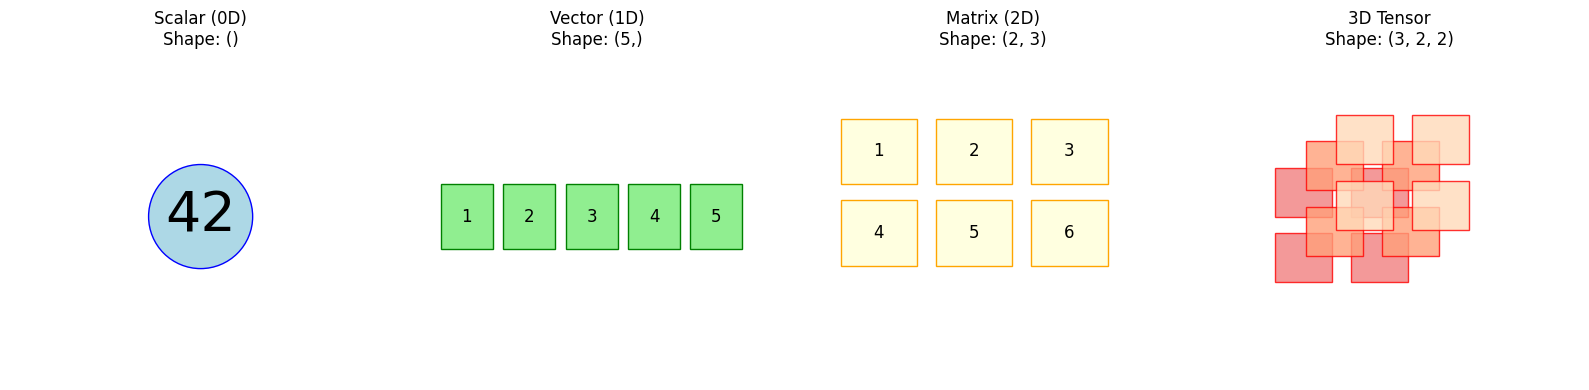

In [7]:
def visualize_tensor_shapes():
    """Visual representation of different tensor dimensions."""
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    # Scalar
    axes[0].text(0.5, 0.5, '42', fontsize=40, ha='center', va='center',
                 bbox=dict(boxstyle='circle', facecolor='lightblue', edgecolor='blue'))
    axes[0].set_xlim(0, 1)
    axes[0].set_ylim(0, 1)
    axes[0].set_title('Scalar (0D)\nShape: ()', fontsize=12)
    axes[0].axis('off')

    # Vector
    vector_data = [1, 2, 3, 4, 5]
    for i, v in enumerate(vector_data):
        axes[1].add_patch(plt.Rectangle((i*0.18, 0.4), 0.15, 0.2,
                         facecolor='lightgreen', edgecolor='green'))
        axes[1].text(i*0.18 + 0.075, 0.5, str(v), ha='center', va='center', fontsize=12)
    axes[1].set_xlim(-0.1, 1)
    axes[1].set_ylim(0, 1)
    axes[1].set_title('Vector (1D)\nShape: (5,)', fontsize=12)
    axes[1].axis('off')

    # Matrix
    matrix_data = [[1, 2, 3], [4, 5, 6]]
    for i in range(2):
        for j in range(3):
            axes[2].add_patch(plt.Rectangle((j*0.25 + 0.1, 0.6 - i*0.25), 0.2, 0.2,
                             facecolor='lightyellow', edgecolor='orange'))
            axes[2].text(j*0.25 + 0.2, 0.7 - i*0.25, str(matrix_data[i][j]),
                        ha='center', va='center', fontsize=12)
    axes[2].set_xlim(0, 1)
    axes[2].set_ylim(0, 1)
    axes[2].set_title('Matrix (2D)\nShape: (2, 3)', fontsize=12)
    axes[2].axis('off')

    # 3D Tensor (simplified representation)
    colors = ['lightcoral', 'lightsalmon', 'peachpuff']
    for k in range(3):
        offset = k * 0.08
        for i in range(2):
            for j in range(2):
                axes[3].add_patch(plt.Rectangle(
                    (j*0.2 + 0.2 + offset, 0.5 - i*0.2 + offset),
                    0.15, 0.15,
                    facecolor=colors[k], edgecolor='red', alpha=0.8))
    axes[3].set_xlim(0, 1)
    axes[3].set_ylim(0, 1)
    axes[3].set_title('3D Tensor\nShape: (3, 2, 2)', fontsize=12)
    axes[3].axis('off')

    plt.tight_layout()
    plt.show()

visualize_tensor_shapes()

In [8]:
# ============================================================
# METHOD 2: Special Tensor Constructors
# ============================================================

print("=" * 50)
print("ZEROS - All elements are 0")
print("=" * 50)
zeros = tf.zeros((3, 4))  # 3 rows, 4 columns
print(f"tf.zeros((3, 4)):\n{zeros}\n")

print("=" * 50)
print("ONES - All elements are 1")
print("=" * 50)
ones = tf.ones((2, 3))
print(f"tf.ones((2, 3)):\n{ones}\n")

print("=" * 50)
print("FILL - All elements are a specific value")
print("=" * 50)
filled = tf.fill((2, 2), 7.0)
print(f"tf.fill((2, 2), 7.0):\n{filled}\n")

ZEROS - All elements are 0
tf.zeros((3, 4)):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

ONES - All elements are 1
tf.ones((2, 3)):
[[1. 1. 1.]
 [1. 1. 1.]]

FILL - All elements are a specific value
tf.fill((2, 2), 7.0):
[[7. 7.]
 [7. 7.]]



In [9]:
print("=" * 50)
print("IDENTITY MATRIX - 1s on diagonal, 0s elsewhere")
print("=" * 50)
identity = tf.eye(4)  # 4x4 identity matrix
print(f"tf.eye(4):\n{identity}\n")

print("=" * 50)
print("DIAGONAL - Create diagonal matrix from vector")
print("=" * 50)
diag = tf.linalg.diag([1, 2, 3, 4])
print(f"tf.linalg.diag([1, 2, 3, 4]):\n{diag}\n")

IDENTITY MATRIX - 1s on diagonal, 0s elsewhere
tf.eye(4):
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

DIAGONAL - Create diagonal matrix from vector
tf.linalg.diag([1, 2, 3, 4]):
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]



In [10]:
print("=" * 50)
print("RANGE - Sequential values")
print("=" * 50)
range_tensor = tf.range(0, 10, 2)  # start, stop, step
print(f"tf.range(0, 10, 2): {range_tensor}\n")

print("=" * 50)
print("LINSPACE - Evenly spaced values")
print("=" * 50)
linspace = tf.linspace(0.0, 1.0, 5)  # 5 values from 0 to 1
print(f"tf.linspace(0.0, 1.0, 5): {linspace}\n")

RANGE - Sequential values
tf.range(0, 10, 2): [0 2 4 6 8]

LINSPACE - Evenly spaced values
tf.linspace(0.0, 1.0, 5): [0.   0.25 0.5  0.75 1.  ]



In [11]:
# ============================================================
# METHOD 3: Random Tensors (Very important for neural networks!)
# ============================================================

print("=" * 50)
print("RANDOM UNIFORM - Values uniformly distributed in [min, max)")
print("=" * 50)
uniform = tf.random.uniform((3, 3), minval=0, maxval=10)
print(f"tf.random.uniform((3, 3), minval=0, maxval=10):\n{uniform}\n")

print("=" * 50)
print("RANDOM NORMAL - Values from normal (Gaussian) distribution")
print("=" * 50)
normal = tf.random.normal((3, 3), mean=0.0, stddev=1.0)
print(f"tf.random.normal((3, 3), mean=0.0, stddev=1.0):\n{normal}\n")

print("=" * 50)
print("TRUNCATED NORMAL - Normal but values >2σ are redrawn")
print("=" * 50)
truncated = tf.random.truncated_normal((3, 3), mean=0.0, stddev=1.0)
print(f"tf.random.truncated_normal((3, 3)):\n{truncated}")
print("(Used in weight initialization to avoid extreme values)")

RANDOM UNIFORM - Values uniformly distributed in [min, max)
tf.random.uniform((3, 3), minval=0, maxval=10):
[[6.6456213  4.4100676  3.528825  ]
 [4.6448255  0.33660412 6.8467236 ]
 [7.4011745  8.724445   2.2632635 ]]

RANDOM NORMAL - Values from normal (Gaussian) distribution
tf.random.normal((3, 3), mean=0.0, stddev=1.0):
[[ 0.08422458 -0.86090374  0.37812304]
 [-0.00519627 -0.49453196  0.6178192 ]
 [-0.33082047 -0.00138408 -0.4237341 ]]

TRUNCATED NORMAL - Normal but values >2σ are redrawn
tf.random.truncated_normal((3, 3)):
[[-0.55909735 -0.5347214  -1.5725931 ]
 [ 0.8055056  -0.00413082  0.17250952]
 [ 0.2923304   0.44746324 -0.2051262 ]]
(Used in weight initialization to avoid extreme values)


### Deep Learning Weight Initialization Patterns

In [12]:
# ============================================================
# Common Weight Initialization Schemes
# ============================================================

n_in, n_out = 784, 256  # Example: MNIST input to hidden layer

print("=" * 60)
print("WEIGHT INITIALIZATION FOR NEURAL NETWORKS")
print("=" * 60)

# Xavier/Glorot Initialization (good for tanh, sigmoid)
# Variance = 2 / (n_in + n_out)
xavier_stddev = np.sqrt(2.0 / (n_in + n_out))
xavier_weights = tf.random.normal((n_in, n_out), stddev=xavier_stddev)
print(f"\n1. Xavier/Glorot Initialization")
print(f"   Formula: stddev = sqrt(2 / (n_in + n_out))")
print(f"   stddev = sqrt(2 / ({n_in} + {n_out})) = {xavier_stddev:.6f}")
print(f"   Shape: {xavier_weights.shape}")

# He Initialization (good for ReLU)
# Variance = 2 / n_in
he_stddev = np.sqrt(2.0 / n_in)
he_weights = tf.random.normal((n_in, n_out), stddev=he_stddev)
print(f"\n2. He Initialization (for ReLU)")
print(f"   Formula: stddev = sqrt(2 / n_in)")
print(f"   stddev = sqrt(2 / {n_in}) = {he_stddev:.6f}")
print(f"   Shape: {he_weights.shape}")

# Using Keras initializers (recommended!)
print(f"\n3. Using Keras Initializers (Recommended):")
glorot_init = tf.keras.initializers.GlorotUniform()
he_init = tf.keras.initializers.HeNormal()

glorot_weights = glorot_init((n_in, n_out))
he_weights_keras = he_init((n_in, n_out))

print(f"   tf.keras.initializers.GlorotUniform() → shape {glorot_weights.shape}")
print(f"   tf.keras.initializers.HeNormal() → shape {he_weights_keras.shape}")

WEIGHT INITIALIZATION FOR NEURAL NETWORKS

1. Xavier/Glorot Initialization
   Formula: stddev = sqrt(2 / (n_in + n_out))
   stddev = sqrt(2 / (784 + 256)) = 0.043853
   Shape: (784, 256)

2. He Initialization (for ReLU)
   Formula: stddev = sqrt(2 / n_in)
   stddev = sqrt(2 / 784) = 0.050508
   Shape: (784, 256)

3. Using Keras Initializers (Recommended):
   tf.keras.initializers.GlorotUniform() → shape (784, 256)
   tf.keras.initializers.HeNormal() → shape (784, 256)


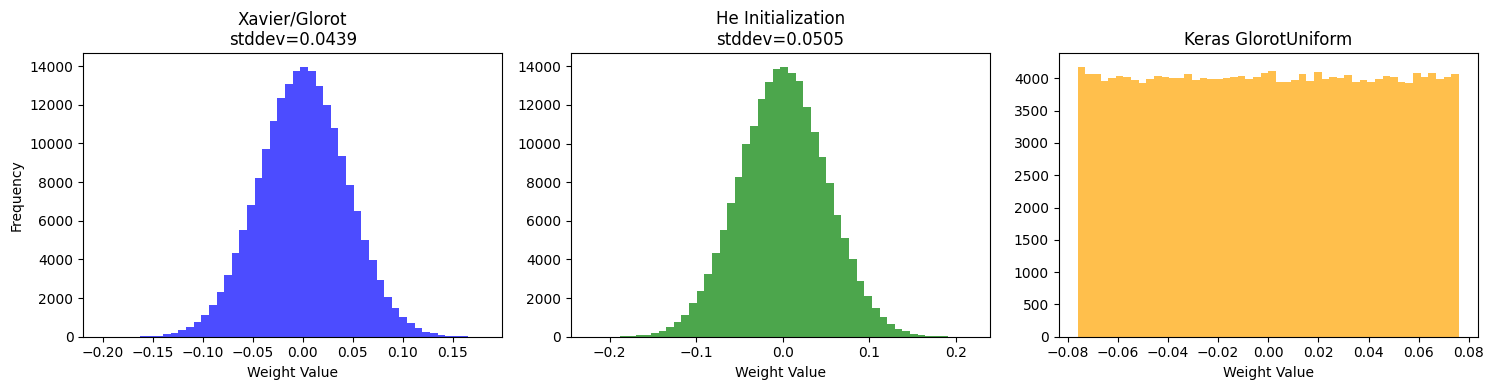

In [13]:
# Visualize the distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(tf.reshape(xavier_weights, [-1]).numpy(), bins=50, alpha=0.7, color='blue')
axes[0].set_title(f'Xavier/Glorot\nstddev={xavier_stddev:.4f}')
axes[0].set_xlabel('Weight Value')
axes[0].set_ylabel('Frequency')

axes[1].hist(tf.reshape(he_weights, [-1]).numpy(), bins=50, alpha=0.7, color='green')
axes[1].set_title(f'He Initialization\nstddev={he_stddev:.4f}')
axes[1].set_xlabel('Weight Value')

axes[2].hist(tf.reshape(glorot_weights, [-1]).numpy(), bins=50, alpha=0.7, color='orange')
axes[2].set_title('Keras GlorotUniform')
axes[2].set_xlabel('Weight Value')

plt.tight_layout()
plt.show()

---

## 1.2 Tensor Data Types (dtypes)

Choosing the right data type is crucial for:
- **Memory efficiency**: float16 uses half the memory of float32
- **Computation speed**: Some operations are faster with certain types
- **Numerical precision**: float64 for high-precision calculations

In [14]:
# ============================================================
# Common Data Types in TensorFlow
# ============================================================

print("=" * 60)
print("TENSORFLOW DATA TYPES")
print("=" * 60)

dtypes_info = [
    ("tf.float16", tf.float16, "Half precision (memory efficient, GPU)"),
    ("tf.float32", tf.float32, "Default for neural networks"),
    ("tf.float64", tf.float64, "Double precision (high accuracy)"),
    ("tf.int32", tf.int32, "Integer operations, indices"),
    ("tf.int64", tf.int64, "Large integers"),
    ("tf.bool", tf.bool, "Boolean masks and conditions"),
    ("tf.string", tf.string, "Text data"),
]

print(f"\n{'Type':<15} {'Example':<30} {'Use Case'}")
print("-" * 70)
for name, dtype, use_case in dtypes_info:
    if dtype == tf.string:
        example = tf.constant(["hello"], dtype=dtype)
    elif dtype == tf.bool:
        example = tf.constant([True, False], dtype=dtype)
    else:
        # Check if the dtype is an integer type
        if dtype in [tf.int32, tf.int64]:
            example = tf.constant([1, 2], dtype=dtype)
        else: # float types
            example = tf.constant([1.0, 2.0], dtype=dtype)
    print(f"{name:<15} {str(example.numpy()):<30} {use_case}")

TENSORFLOW DATA TYPES

Type            Example                        Use Case
----------------------------------------------------------------------
tf.float16      [1. 2.]                        Half precision (memory efficient, GPU)
tf.float32      [1. 2.]                        Default for neural networks
tf.float64      [1. 2.]                        Double precision (high accuracy)
tf.int32        [1 2]                          Integer operations, indices
tf.int64        [1 2]                          Large integers
tf.bool         [ True False]                  Boolean masks and conditions
tf.string       [b'hello']                     Text data


In [15]:
# ============================================================
# Type Casting (Converting between types)
# ============================================================

print("\n" + "=" * 60)
print("TYPE CASTING")
print("=" * 60)

# Original tensor
original = tf.constant([1.5, 2.7, 3.2])
print(f"\nOriginal: {original} (dtype: {original.dtype})")

# Cast to different types
as_int = tf.cast(original, tf.int32)
print(f"As int32: {as_int} (truncates decimals!)")

as_float64 = tf.cast(original, tf.float64)
print(f"As float64: {as_float64}")

# Common pattern: int labels to float for loss computation
labels = tf.constant([0, 1, 1, 0])  # Integer labels
labels_float = tf.cast(labels, tf.float32)
print(f"\nLabels (int): {labels}")
print(f"Labels (float): {labels_float}  ← needed for binary cross-entropy")


TYPE CASTING

Original: [1.5 2.7 3.2] (dtype: <dtype: 'float32'>)
As int32: [1 2 3] (truncates decimals!)
As float64: [1.5        2.70000005 3.20000005]

Labels (int): [0 1 1 0]
Labels (float): [0. 1. 1. 0.]  ← needed for binary cross-entropy


In [16]:
# ============================================================
# Memory Usage Comparison
# ============================================================

print("\n" + "=" * 60)
print("MEMORY USAGE BY DATA TYPE")
print("=" * 60)

shape = (1000, 1000)  # 1 million elements

# Calculate memory for different dtypes
dtypes_memory = [
    ("float16", tf.float16, 2),
    ("float32", tf.float32, 4),
    ("float64", tf.float64, 8),
    ("int32", tf.int32, 4),
]

print(f"\nFor tensor shape {shape} (1 million elements):")
print(f"{'Data Type':<12} {'Bytes/Element':<15} {'Total Memory'}")
print("-" * 45)
for name, dtype, bytes_per in dtypes_memory:
    total = shape[0] * shape[1] * bytes_per
    print(f"{name:<12} {bytes_per:<15} {total / (1024*1024):.2f} MB")


MEMORY USAGE BY DATA TYPE

For tensor shape (1000, 1000) (1 million elements):
Data Type    Bytes/Element   Total Memory
---------------------------------------------
float16      2               1.91 MB
float32      4               3.81 MB
float64      8               7.63 MB
int32        4               3.81 MB


---

## 1.3 Tensor Attributes

Every tensor has important attributes you'll use constantly:

In [17]:
# Create a sample tensor
sample = tf.random.normal((2, 3, 4))

print("=" * 60)
print("TENSOR ATTRIBUTES")
print("=" * 60)

print(f"\nTensor: tf.random.normal((2, 3, 4))")
print(f"")
print(f"  .shape     → {sample.shape}        # Dimensions as TensorShape")
print(f"  .ndim      → {sample.ndim}              # Number of dimensions (rank)")
print(f"  .dtype     → {sample.dtype}    # Data type")
print(f"  .device    → {sample.device}          # Where tensor lives")

# Get shape as list or tensor
print(f"")
print(f"  tf.shape(tensor)  → {tf.shape(sample)}  # Shape as tensor")
print(f"  list(shape)       → {list(sample.shape)}       # Shape as Python list")

# Total number of elements
print(f"")
print(f"  tf.size(tensor)   → {tf.size(sample)}       # Total elements: 2×3×4=24")

TENSOR ATTRIBUTES

Tensor: tf.random.normal((2, 3, 4))

  .shape     → (2, 3, 4)        # Dimensions as TensorShape
  .ndim      → 3              # Number of dimensions (rank)
  .dtype     → <dtype: 'float32'>    # Data type
  .device    → /job:localhost/replica:0/task:0/device:CPU:0          # Where tensor lives

  tf.shape(tensor)  → [2 3 4]  # Shape as tensor
  list(shape)       → [2, 3, 4]       # Shape as Python list

  tf.size(tensor)   → 24       # Total elements: 2×3×4=24


---

## 1.4 Converting Between TensorFlow, NumPy, and Python

Seamless interoperability is one of TensorFlow's strengths:

In [18]:
print("=" * 60)
print("CONVERSIONS: TensorFlow ↔ NumPy ↔ Python")
print("=" * 60)

# TensorFlow → NumPy
tf_tensor = tf.constant([[1, 2], [3, 4]])
np_array = tf_tensor.numpy()
print(f"\nTensorFlow → NumPy:")
print(f"  tf_tensor.numpy() → {type(np_array)}")
print(f"  {np_array}")

# NumPy → TensorFlow
np_array = np.array([[5, 6], [7, 8]])
tf_from_np = tf.constant(np_array)
print(f"\nNumPy → TensorFlow:")
print(f"  tf.constant(np_array) → {type(tf_from_np)}")
print(f"  {tf_from_np}")

# Also works with tf.convert_to_tensor
tf_converted = tf.convert_to_tensor(np_array)
print(f"\n  tf.convert_to_tensor(np_array) → {type(tf_converted)}")

# Scalar tensor → Python number
scalar_tensor = tf.constant(3.14159)
python_float = float(scalar_tensor)
print(f"\nScalar → Python:")
print(f"  float(tf.constant(3.14159)) → {python_float} (type: {type(python_float)})")

CONVERSIONS: TensorFlow ↔ NumPy ↔ Python

TensorFlow → NumPy:
  tf_tensor.numpy() → <class 'numpy.ndarray'>
  [[1 2]
 [3 4]]

NumPy → TensorFlow:
  tf.constant(np_array) → <class 'tensorflow.python.framework.ops.EagerTensor'>
  [[5 6]
 [7 8]]

  tf.convert_to_tensor(np_array) → <class 'tensorflow.python.framework.ops.EagerTensor'>

Scalar → Python:
  float(tf.constant(3.14159)) → 3.141590118408203 (type: <class 'float'>)


### Important: TensorFlow Operations Work on NumPy Too!

In [19]:
# TensorFlow functions automatically convert NumPy arrays
np_arr = np.array([1, 2, 3, 4, 5])

# This works! TensorFlow converts automatically
result = tf.reduce_sum(np_arr)  # NumPy array as input
print(f"tf.reduce_sum(np_array) = {result}")

# Mixed operations work too
tf_tensor = tf.constant([10, 20, 30, 40, 50])
combined = tf_tensor + np_arr  # TensorFlow tensor + NumPy array
print(f"tf_tensor + np_array = {combined}")

tf.reduce_sum(np_array) = 15
tf_tensor + np_array = [11 22 33 44 55]


---

# Part 2: Indexing, Slicing, and Reshaping

These operations are **essential** for manipulating data in neural networks. You'll use them constantly!

---

## 2.1 Basic Indexing

TensorFlow indexing works similar to NumPy:

In [20]:
# ============================================================
# BASIC INDEXING - Accessing Single Elements
# ============================================================

# Create a sample matrix
matrix = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print("Matrix:")
print(matrix)
print(f"Shape: {matrix.shape}\n")

# Access single element: matrix[row, column]
print("Single element access:")
print(f"  matrix[0, 0] = {matrix[0, 0]}  # First row, first column")
print(f"  matrix[1, 2] = {matrix[1, 2]}  # Second row, third column")
print(f"  matrix[2, 3] = {matrix[2, 3]}  # Third row, fourth column")

# Negative indexing (from the end)
print(f"\nNegative indexing:")
print(f"  matrix[-1, -1] = {matrix[-1, -1]}  # Last row, last column")
print(f"  matrix[-1, 0] = {matrix[-1, 0]}   # Last row, first column")

Matrix:
tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)
Shape: (3, 4)

Single element access:
  matrix[0, 0] = 1  # First row, first column
  matrix[1, 2] = 7  # Second row, third column
  matrix[2, 3] = 12  # Third row, fourth column

Negative indexing:
  matrix[-1, -1] = 12  # Last row, last column
  matrix[-1, 0] = 9   # Last row, first column


In [21]:
# ============================================================
# ROW AND COLUMN ACCESS
# ============================================================

print("=" * 50)
print("ACCESSING ROWS AND COLUMNS")
print("=" * 50)

# Access entire row
print(f"\nEntire row (matrix[1]):")
print(f"  {matrix[1]}  # Second row")

# Access entire column
print(f"\nEntire column (matrix[:, 2]):")
print(f"  {matrix[:, 2]}  # Third column")

# Access multiple rows
print(f"\nFirst two rows (matrix[:2]):")
print(matrix[:2])

# Access specific rows and columns
print(f"\nRows 0-1, Columns 1-2 (matrix[:2, 1:3]):")
print(matrix[:2, 1:3])

ACCESSING ROWS AND COLUMNS

Entire row (matrix[1]):
  [5 6 7 8]  # Second row

Entire column (matrix[:, 2]):
  [ 3  7 11]  # Third column

First two rows (matrix[:2]):
tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int32)

Rows 0-1, Columns 1-2 (matrix[:2, 1:3]):
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)


### Slicing Syntax: `[start:stop:step]`

```
tensor[start:stop:step]
         ↓     ↓    ↓
     include  exclude  skip
```

- `start`: Index to start from (default: 0)
- `stop`: Index to stop at (excluded)
- `step`: Step size (default: 1)

In [22]:
# ============================================================
# SLICING WITH STEP
# ============================================================

print("=" * 50)
print("SLICING WITH STEP")
print("=" * 50)

vector = tf.constant([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(f"Vector: {vector}\n")

print("Examples:")
print(f"  vector[::2]   = {vector[::2]}   # Every 2nd element")
print(f"  vector[1::2]  = {vector[1::2]}   # Every 2nd, starting at 1")
print(f"  vector[::-1]  = {vector[::-1]}  # Reverse")
print(f"  vector[2:8:2] = {vector[2:8:2]}        # From 2 to 8, step 2")

SLICING WITH STEP
Vector: [0 1 2 3 4 5 6 7 8 9]

Examples:
  vector[::2]   = [0 2 4 6 8]   # Every 2nd element
  vector[1::2]  = [1 3 5 7 9]   # Every 2nd, starting at 1
  vector[::-1]  = [9 8 7 6 5 4 3 2 1 0]  # Reverse
  vector[2:8:2] = [2 4 6]        # From 2 to 8, step 2


## 2.2 Advanced Indexing with `tf.gather` and `tf.gather_nd`

When you need to extract elements at specific indices (not just slices), use these functions:

In [23]:
# ============================================================
# tf.gather - Select elements along an axis
# ============================================================

print("=" * 60)
print("tf.gather - Select elements at specific indices along an axis")
print("=" * 60)

matrix = tf.constant([
    [10, 20, 30],
    [40, 50, 60],
    [70, 80, 90],
    [100, 110, 120]
])
print(f"Matrix:\n{matrix}\n")

# Gather specific rows
indices = [0, 2, 3]  # Get rows 0, 2, and 3
gathered_rows = tf.gather(matrix, indices, axis=0)
print(f"tf.gather(matrix, [0, 2, 3], axis=0)  # Select rows 0, 2, 3:")
print(f"{gathered_rows}\n")

# Gather specific columns
col_indices = [0, 2]  # Get columns 0 and 2
gathered_cols = tf.gather(matrix, col_indices, axis=1)
print(f"tf.gather(matrix, [0, 2], axis=1)  # Select columns 0, 2:")
print(f"{gathered_cols}")

tf.gather - Select elements at specific indices along an axis
Matrix:
[[ 10  20  30]
 [ 40  50  60]
 [ 70  80  90]
 [100 110 120]]

tf.gather(matrix, [0, 2, 3], axis=0)  # Select rows 0, 2, 3:
[[ 10  20  30]
 [ 70  80  90]
 [100 110 120]]

tf.gather(matrix, [0, 2], axis=1)  # Select columns 0, 2:
[[ 10  30]
 [ 40  60]
 [ 70  90]
 [100 120]]


In [24]:
# ============================================================
# tf.gather_nd - Multi-dimensional indexing
# ============================================================

print("=" * 60)
print("tf.gather_nd - Select specific (row, col) coordinates")
print("=" * 60)

# Get specific elements by their coordinates
coordinates = [[0, 0], [1, 1], [2, 2], [3, 0]]  # Diagonal + one extra
gathered_nd = tf.gather_nd(matrix, coordinates)
print(f"\nMatrix:\n{matrix}\n")
print(f"Coordinates: {coordinates}")
print(f"tf.gather_nd(matrix, coordinates):")
print(f"  → {gathered_nd}  # Values at (0,0), (1,1), (2,2), (3,0)")

tf.gather_nd - Select specific (row, col) coordinates

Matrix:
[[ 10  20  30]
 [ 40  50  60]
 [ 70  80  90]
 [100 110 120]]

Coordinates: [[0, 0], [1, 1], [2, 2], [3, 0]]
tf.gather_nd(matrix, coordinates):
  → [ 10  50  90 100]  # Values at (0,0), (1,1), (2,2), (3,0)


## 2.3 Boolean Masking

Select elements based on conditions - extremely useful for filtering!

In [25]:
# ============================================================
# BOOLEAN MASKING
# ============================================================

print("=" * 60)
print("BOOLEAN MASKING - Filter by condition")
print("=" * 60)

data = tf.constant([1, -2, 3, -4, 5, -6, 7, -8, 9])
print(f"\nData: {data}\n")

# Create boolean mask
mask = data > 0
print(f"Mask (data > 0): {mask}")

# Apply mask with tf.boolean_mask
positive_values = tf.boolean_mask(data, mask)
print(f"tf.boolean_mask(data, mask): {positive_values}\n")

# More examples
print("More filtering examples:")
large_values = tf.boolean_mask(data, tf.abs(data) > 3)
print(f"  |data| > 3: {large_values}")

even_values = tf.boolean_mask(data, data % 2 == 0)
print(f"  even values: {even_values}")

BOOLEAN MASKING - Filter by condition

Data: [ 1 -2  3 -4  5 -6  7 -8  9]

Mask (data > 0): [ True False  True False  True False  True False  True]
tf.boolean_mask(data, mask): [1 3 5 7 9]

More filtering examples:
  |data| > 3: [-4  5 -6  7 -8  9]
  even values: [-2 -4 -6 -8]


---

## 2.4 Reshaping Operations

Reshaping is **fundamental** in deep learning. You'll constantly reshape data between layers!

### The Golden Rule
> **Total elements must remain the same!**  
> A tensor with shape `(2, 6)` has 12 elements, so it can become `(3, 4)`, `(12,)`, `(2, 2, 3)`, etc.

In [26]:
# ============================================================
# tf.reshape - The most common reshaping operation
# ============================================================

print("=" * 60)
print("tf.reshape - Change tensor dimensions")
print("=" * 60)

original = tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
print(f"Original: {original}")
print(f"Shape: {original.shape}, Elements: {tf.size(original)}\n")

# Reshape to different shapes
shapes = [(2, 6), (3, 4), (4, 3), (6, 2), (2, 2, 3), (2, 3, 2)]

for shape in shapes:
    reshaped = tf.reshape(original, shape)
    print(f"tf.reshape(original, {shape}):")
    print(f"{reshaped}\n")

tf.reshape - Change tensor dimensions
Original: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Shape: (12,), Elements: 12

tf.reshape(original, (2, 6)):
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]

tf.reshape(original, (3, 4)):
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

tf.reshape(original, (4, 3)):
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

tf.reshape(original, (6, 2)):
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]

tf.reshape(original, (2, 2, 3)):
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]

tf.reshape(original, (2, 3, 2)):
[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]]



In [27]:
# ============================================================
# Using -1 as a wildcard (auto-calculate dimension)
# ============================================================

print("=" * 60)
print("Using -1 to auto-calculate a dimension")
print("=" * 60)

data = tf.random.uniform((24,), minval=0, maxval=100, dtype=tf.int32)
print(f"Original shape: {data.shape} ({tf.size(data)} elements)\n")

# -1 means "figure it out"
print("Using -1 as wildcard:")
print(f"  tf.reshape(data, (4, -1)) → {tf.reshape(data, (4, -1)).shape}  # 24/4=6")
print(f"  tf.reshape(data, (-1, 6)) → {tf.reshape(data, (-1, 6)).shape}  # 24/6=4")
print(f"  tf.reshape(data, (2, 3, -1)) → {tf.reshape(data, (2, 3, -1)).shape}  # 24/(2*3)=4")
print(f"  tf.reshape(data, (-1,)) → {tf.reshape(data, (-1,)).shape}  # Flatten")

# Common pattern: Flatten for dense layer
batch_images = tf.random.normal((32, 28, 28, 1))  # MNIST-like
print(f"\nFlatten for Dense layer:")
print(f"  Input: {batch_images.shape}  # (batch, height, width, channels)")
flattened = tf.reshape(batch_images, (32, -1))
print(f"  Output: {flattened.shape}  # (batch, features)")

Using -1 to auto-calculate a dimension
Original shape: (24,) (24 elements)

Using -1 as wildcard:
  tf.reshape(data, (4, -1)) → (4, 6)  # 24/4=6
  tf.reshape(data, (-1, 6)) → (4, 6)  # 24/6=4
  tf.reshape(data, (2, 3, -1)) → (2, 3, 4)  # 24/(2*3)=4
  tf.reshape(data, (-1,)) → (24,)  # Flatten

Flatten for Dense layer:
  Input: (32, 28, 28, 1)  # (batch, height, width, channels)
  Output: (32, 784)  # (batch, features)


In [28]:
# ============================================================
# tf.transpose - Swap dimensions
# ============================================================

print("=" * 60)
print("tf.transpose - Swap/reorder dimensions")
print("=" * 60)

matrix = tf.constant([
    [1, 2, 3],
    [4, 5, 6]
])
print(f"Original matrix (2, 3):\n{matrix}\n")

transposed = tf.transpose(matrix)
print(f"Transposed (3, 2):\n{transposed}\n")

# For higher dimensions, specify perm (permutation)
tensor_3d = tf.random.uniform((2, 3, 4))
print(f"3D tensor shape: {tensor_3d.shape}")
print(f"tf.transpose(tensor_3d, perm=[0, 2, 1]): {tf.transpose(tensor_3d, perm=[0, 2, 1]).shape}")
print(f"tf.transpose(tensor_3d, perm=[2, 0, 1]): {tf.transpose(tensor_3d, perm=[2, 0, 1]).shape}")

tf.transpose - Swap/reorder dimensions
Original matrix (2, 3):
[[1 2 3]
 [4 5 6]]

Transposed (3, 2):
[[1 4]
 [2 5]
 [3 6]]

3D tensor shape: (2, 3, 4)
tf.transpose(tensor_3d, perm=[0, 2, 1]): (2, 4, 3)
tf.transpose(tensor_3d, perm=[2, 0, 1]): (4, 2, 3)


In [29]:
# ============================================================
# tf.expand_dims and tf.squeeze - Add/remove dimensions
# ============================================================

print("=" * 60)
print("tf.expand_dims - Add a dimension of size 1")
print("=" * 60)

vector = tf.constant([1, 2, 3, 4])
print(f"Original vector: {vector}, shape: {vector.shape}\n")

# Add dimension at different positions
print("Adding dimension:")
print(f"  tf.expand_dims(vector, axis=0): {tf.expand_dims(vector, axis=0).shape}  # Row vector")
print(f"  tf.expand_dims(vector, axis=1): {tf.expand_dims(vector, axis=1).shape}  # Column vector")
print(f"  tf.expand_dims(vector, axis=-1): {tf.expand_dims(vector, axis=-1).shape}  # Same as axis=1")

# Real-world example: adding batch dimension
single_image = tf.random.normal((28, 28, 1))  # Single image
print(f"\nSingle image shape: {single_image.shape}")
batched = tf.expand_dims(single_image, axis=0)  # Add batch dimension
print(f"With batch dim: {batched.shape}  # Now can pass to model")

tf.expand_dims - Add a dimension of size 1
Original vector: [1 2 3 4], shape: (4,)

Adding dimension:
  tf.expand_dims(vector, axis=0): (1, 4)  # Row vector
  tf.expand_dims(vector, axis=1): (4, 1)  # Column vector
  tf.expand_dims(vector, axis=-1): (4, 1)  # Same as axis=1

Single image shape: (28, 28, 1)
With batch dim: (1, 28, 28, 1)  # Now can pass to model


In [30]:
print("\n" + "=" * 60)
print("tf.squeeze - Remove dimensions of size 1")
print("=" * 60)

# Tensor with extra dimensions
expanded = tf.random.normal((1, 4, 1, 3, 1))
print(f"Original shape: {expanded.shape}")

squeezed = tf.squeeze(expanded)
print(f"After tf.squeeze: {squeezed.shape}  # All size-1 dims removed")

# Squeeze specific axis
squeezed_axis = tf.squeeze(expanded, axis=0)
print(f"tf.squeeze(tensor, axis=0): {squeezed_axis.shape}  # Only axis 0")


tf.squeeze - Remove dimensions of size 1
Original shape: (1, 4, 1, 3, 1)
After tf.squeeze: (4, 3)  # All size-1 dims removed
tf.squeeze(tensor, axis=0): (4, 1, 3, 1)  # Only axis 0


## 2.5 Combining Tensors: Concatenate and Stack

In [31]:
# ============================================================
# tf.concat - Join tensors along existing axis
# ============================================================

print("=" * 60)
print("tf.concat - Join along existing dimension")
print("=" * 60)

a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[5, 6], [7, 8]])
print(f"a (2, 2):\n{a}\n")
print(f"b (2, 2):\n{b}\n")

# Concatenate along axis 0 (rows)
concat_rows = tf.concat([a, b], axis=0)
print(f"tf.concat([a, b], axis=0) → shape {concat_rows.shape}:")
print(f"{concat_rows}\n")

# Concatenate along axis 1 (columns)
concat_cols = tf.concat([a, b], axis=1)
print(f"tf.concat([a, b], axis=1) → shape {concat_cols.shape}:")
print(f"{concat_cols}")

tf.concat - Join along existing dimension
a (2, 2):
[[1 2]
 [3 4]]

b (2, 2):
[[5 6]
 [7 8]]

tf.concat([a, b], axis=0) → shape (4, 2):
[[1 2]
 [3 4]
 [5 6]
 [7 8]]

tf.concat([a, b], axis=1) → shape (2, 4):
[[1 2 5 6]
 [3 4 7 8]]


In [32]:
# ============================================================
# tf.stack - Create NEW dimension when joining
# ============================================================

print("=" * 60)
print("tf.stack - Create new dimension when joining")
print("=" * 60)

x = tf.constant([1, 2, 3])
y = tf.constant([4, 5, 6])
z = tf.constant([7, 8, 9])
print(f"x, y, z shapes: {x.shape}, {y.shape}, {z.shape}\n")

# Stack creates a new dimension
stacked_0 = tf.stack([x, y, z], axis=0)
print(f"tf.stack([x, y, z], axis=0) → shape {stacked_0.shape}:")
print(f"{stacked_0}\n")

stacked_1 = tf.stack([x, y, z], axis=1)
print(f"tf.stack([x, y, z], axis=1) → shape {stacked_1.shape}:")
print(f"{stacked_1}")

# Key difference visualization
print("\n" + "=" * 60)
print("CONCAT vs STACK")
print("=" * 60)
print("concat: Joins along EXISTING axis (no new dimension)")
print("stack:  Creates NEW axis when joining")

tf.stack - Create new dimension when joining
x, y, z shapes: (3,), (3,), (3,)

tf.stack([x, y, z], axis=0) → shape (3, 3):
[[1 2 3]
 [4 5 6]
 [7 8 9]]

tf.stack([x, y, z], axis=1) → shape (3, 3):
[[1 4 7]
 [2 5 8]
 [3 6 9]]

CONCAT vs STACK
concat: Joins along EXISTING axis (no new dimension)
stack:  Creates NEW axis when joining


---

# Part 3: Mathematical Operations and Broadcasting

Now we get to the heart of tensor computation! These operations are what make neural networks work.

---

## 3.1 Element-wise Operations

Operations applied to each element independently:

In [33]:
# ============================================================
# BASIC ARITHMETIC OPERATIONS
# ============================================================

print("=" * 60)
print("ELEMENT-WISE ARITHMETIC")
print("=" * 60)

a = tf.constant([1.0, 2.0, 3.0, 4.0])
b = tf.constant([10.0, 20.0, 30.0, 40.0])

print(f"a = {a}")
print(f"b = {b}\n")

# Using operators (preferred for readability)
print("Using operators:")
print(f"  a + b  = {a + b}")
print(f"  a - b  = {a - b}")
print(f"  a * b  = {a * b}  # Element-wise multiplication!")
print(f"  a / b  = {a / b}")
print(f"  a ** 2 = {a ** 2}")
print(f"  a // b = {a // b}  # Floor division")
print(f"  a % b  = {a % b}   # Modulo")

ELEMENT-WISE ARITHMETIC
a = [1. 2. 3. 4.]
b = [10. 20. 30. 40.]

Using operators:
  a + b  = [11. 22. 33. 44.]
  a - b  = [ -9. -18. -27. -36.]
  a * b  = [ 10.  40.  90. 160.]  # Element-wise multiplication!
  a / b  = [0.1 0.1 0.1 0.1]
  a ** 2 = [ 1.  4.  9. 16.]
  a // b = [0. 0. 0. 0.]  # Floor division
  a % b  = [1. 2. 3. 4.]   # Modulo


In [34]:
# Using TensorFlow functions (equivalent)
print("\nUsing tf functions (equivalent):")
print(f"  tf.add(a, b)      = {tf.add(a, b)}")
print(f"  tf.subtract(a, b) = {tf.subtract(a, b)}")
print(f"  tf.multiply(a, b) = {tf.multiply(a, b)}")
print(f"  tf.divide(a, b)   = {tf.divide(a, b)}")
print(f"  tf.pow(a, 2)      = {tf.pow(a, 2)}")


Using tf functions (equivalent):
  tf.add(a, b)      = [11. 22. 33. 44.]
  tf.subtract(a, b) = [ -9. -18. -27. -36.]
  tf.multiply(a, b) = [ 10.  40.  90. 160.]
  tf.divide(a, b)   = [0.1 0.1 0.1 0.1]
  tf.pow(a, 2)      = [ 1.  4.  9. 16.]


In [35]:
# ============================================================
# MATHEMATICAL FUNCTIONS
# ============================================================

print("=" * 60)
print("MATHEMATICAL FUNCTIONS (Element-wise)")
print("=" * 60)

x = tf.constant([1.0, 2.0, 3.0, 4.0])
print(f"x = {x}\n")

print("Exponential and Logarithmic:")
print(f"  tf.exp(x)    = {tf.exp(x)}   # e^x")
print(f"  tf.math.log(x)  = {tf.math.log(x)}  # natural log")
# tf.math.log10 is not available in TF2.x, use change of base formula
print(f"  tf.math.log(x) / tf.math.log(10.0) = {tf.math.log(x) / tf.math.log(10.0)}  # log base 10")

print("\nPowers and Roots:")
print(f"  tf.sqrt(x)   = {tf.sqrt(x)}")
print(f"  tf.square(x) = {tf.square(x)}")
print(f"  tf.pow(x, 3) = {tf.pow(x, 3)}")

print("\nAbsolute and Sign:")
y = tf.constant([-2.0, -1.0, 0.0, 1.0, 2.0])
print(f"  y = {y}")
print(f"  tf.abs(y)    = {tf.abs(y)}")
print(f"  tf.sign(y)   = {tf.sign(y)}")

MATHEMATICAL FUNCTIONS (Element-wise)
x = [1. 2. 3. 4.]

Exponential and Logarithmic:
  tf.exp(x)    = [ 2.7182817  7.389056  20.085537  54.59815  ]   # e^x
  tf.math.log(x)  = [0.        0.6931472 1.0986123 1.3862944]  # natural log
  tf.math.log(x) / tf.math.log(10.0) = [0.         0.30102998 0.47712126 0.60205996]  # log base 10

Powers and Roots:
  tf.sqrt(x)   = [1.        1.4142135 1.7320508 2.       ]
  tf.square(x) = [ 1.  4.  9. 16.]
  tf.pow(x, 3) = [ 1.  8. 27. 64.]

Absolute and Sign:
  y = [-2. -1.  0.  1.  2.]
  tf.abs(y)    = [2. 1. 0. 1. 2.]
  tf.sign(y)   = [-1. -1.  0.  1.  1.]


In [36]:
# ============================================================
# TRIGONOMETRIC FUNCTIONS
# ============================================================

print("=" * 60)
print("TRIGONOMETRIC FUNCTIONS")
print("=" * 60)

angles = tf.constant([0.0, np.pi/6, np.pi/4, np.pi/3, np.pi/2])
print(f"Angles (radians): {angles}\n")

print(f"tf.sin(angles) = {tf.sin(angles)}")
print(f"tf.cos(angles) = {tf.cos(angles)}")
print(f"tf.tan(angles[:4]) = {tf.tan(angles[:4])}  # Avoid π/2")

# Hyperbolic (used in some activations)
print("\nHyperbolic functions (used in activations like tanh):")
x = tf.constant([-2.0, -1.0, 0.0, 1.0, 2.0])
print(f"  x = {x}")
print(f"  tf.tanh(x) = {tf.tanh(x)}")
print(f"  tf.sinh(x) = {tf.sinh(x)}")
print(f"  tf.cosh(x) = {tf.cosh(x)}")

TRIGONOMETRIC FUNCTIONS
Angles (radians): [0.        0.5235988 0.7853982 1.0471976 1.5707964]

tf.sin(angles) = [0.         0.5        0.70710677 0.86602545 1.        ]
tf.cos(angles) = [ 1.0000000e+00  8.6602539e-01  7.0710677e-01  4.9999997e-01
 -4.3711388e-08]
tf.tan(angles[:4]) = [0.        0.5773503 1.        1.7320509]  # Avoid π/2

Hyperbolic functions (used in activations like tanh):
  x = [-2. -1.  0.  1.  2.]
  tf.tanh(x) = [-0.9640276 -0.7615942  0.         0.7615942  0.9640276]
  tf.sinh(x) = [-3.6268604 -1.1752012  0.         1.1752012  3.6268604]
  tf.cosh(x) = [3.7621958 1.5430806 1.        1.5430806 3.7621958]


## 3.2 Activation Functions

These are the **non-linear functions** that give neural networks their power!

In [37]:
# ============================================================
# ACTIVATION FUNCTIONS
# ============================================================

print("=" * 60)
print("ACTIVATION FUNCTIONS - The heart of neural networks!")
print("=" * 60)

z = tf.constant([-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0])
print(f"Input z = {z}\n")

# Sigmoid: σ(z) = 1 / (1 + e^(-z))
print("1. SIGMOID - Outputs between 0 and 1")
print(f"   tf.sigmoid(z) = {tf.sigmoid(z)}")
print("   Use: Binary classification output layer\n")

# Tanh: outputs between -1 and 1
print("2. TANH - Outputs between -1 and 1")
print(f"   tf.tanh(z) = {tf.tanh(z)}")
print("   Use: Hidden layers (centered around 0)\n")

# ReLU: max(0, z)
print("3. ReLU - Rectified Linear Unit")
print(f"   tf.nn.relu(z) = {tf.nn.relu(z)}")
print("   Use: Most common hidden layer activation\n")

# Leaky ReLU
print("4. Leaky ReLU - Small slope for negatives")
print(f"   tf.nn.leaky_relu(z, alpha=0.1) = {tf.nn.leaky_relu(z, alpha=0.1)}")
print("   Use: Prevents 'dying ReLU' problem\n")

# ELU
print("5. ELU - Exponential Linear Unit")
print(f"   tf.nn.elu(z) = {tf.nn.elu(z)}")
print("   Use: Smoother than ReLU for negatives")

ACTIVATION FUNCTIONS - The heart of neural networks!
Input z = [-3. -2. -1.  0.  1.  2.  3.]

1. SIGMOID - Outputs between 0 and 1
   tf.sigmoid(z) = [0.04742587 0.11920292 0.26894143 0.5        0.7310586  0.8807971
 0.95257413]
   Use: Binary classification output layer

2. TANH - Outputs between -1 and 1
   tf.tanh(z) = [-0.9950547 -0.9640276 -0.7615942  0.         0.7615942  0.9640276
  0.9950547]
   Use: Hidden layers (centered around 0)

3. ReLU - Rectified Linear Unit
   tf.nn.relu(z) = [0. 0. 0. 0. 1. 2. 3.]
   Use: Most common hidden layer activation

4. Leaky ReLU - Small slope for negatives
   tf.nn.leaky_relu(z, alpha=0.1) = [-0.3 -0.2 -0.1  0.   1.   2.   3. ]
   Use: Prevents 'dying ReLU' problem

5. ELU - Exponential Linear Unit
   tf.nn.elu(z) = [-0.95021296 -0.86466473 -0.63212055  0.          1.          2.
  3.        ]
   Use: Smoother than ReLU for negatives


In [38]:
# Softmax - Special for multi-class classification
print("=" * 60)
print("6. SOFTMAX - Outputs sum to 1 (probability distribution)")
print("=" * 60)

logits = tf.constant([[2.0, 1.0, 0.1]])  # Raw scores from last layer
softmax_output = tf.nn.softmax(logits)
print(f"Logits: {logits}")
print(f"tf.nn.softmax(logits) = {softmax_output}")
print(f"Sum = {tf.reduce_sum(softmax_output)}  # Always sums to 1!")
print("Use: Multi-class classification output layer")

6. SOFTMAX - Outputs sum to 1 (probability distribution)
Logits: [[2.  1.  0.1]]
tf.nn.softmax(logits) = [[0.6590012  0.24243298 0.09856589]]
Sum = 1.0000001192092896  # Always sums to 1!
Use: Multi-class classification output layer


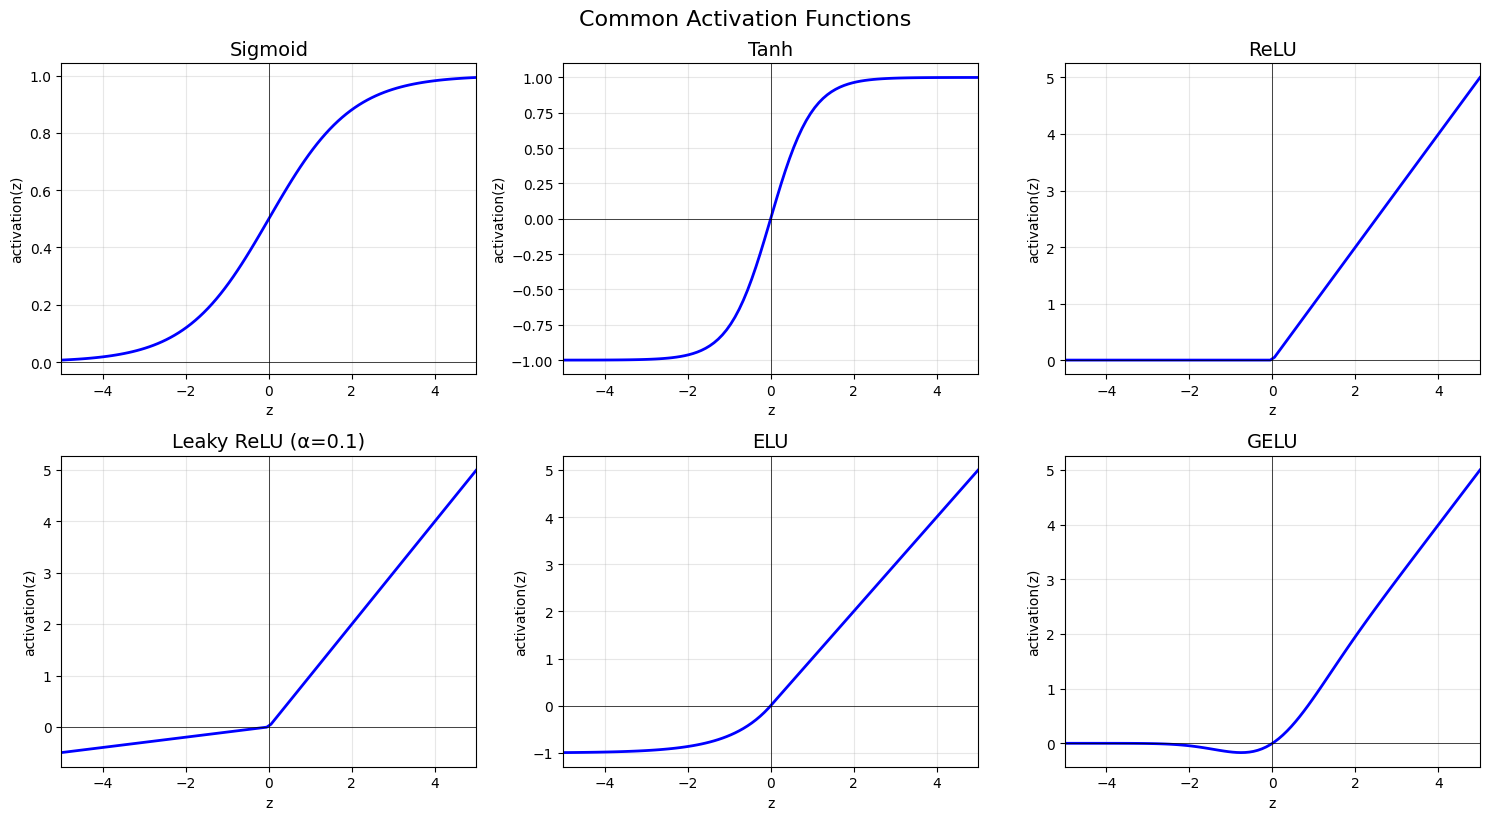

In [39]:
# Visualize activation functions
def plot_activations():
    x = tf.linspace(-5.0, 5.0, 100)

    activations = {
        'Sigmoid': tf.sigmoid(x),
        'Tanh': tf.tanh(x),
        'ReLU': tf.nn.relu(x),
        'Leaky ReLU (α=0.1)': tf.nn.leaky_relu(x, alpha=0.1),
        'ELU': tf.nn.elu(x),
        'GELU': tf.nn.gelu(x),
    }

    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()

    for idx, (name, y) in enumerate(activations.items()):
        axes[idx].plot(x.numpy(), y.numpy(), 'b-', linewidth=2)
        axes[idx].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
        axes[idx].axvline(x=0, color='k', linestyle='-', linewidth=0.5)
        axes[idx].set_title(name, fontsize=14)
        axes[idx].set_xlabel('z')
        axes[idx].set_ylabel('activation(z)')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].set_xlim(-5, 5)

    plt.tight_layout()
    plt.suptitle('Common Activation Functions', y=1.02, fontsize=16)
    plt.show()

plot_activations()

---

## 3.3 Broadcasting

Broadcasting allows operations between tensors of different shapes by automatically expanding dimensions.

### Broadcasting Rules
1. Compare shapes from **right to left**
2. Dimensions are compatible if:
   - They are equal, OR
   - One of them is 1
3. Missing dimensions are treated as 1

In [40]:
# ============================================================
# BROADCASTING EXAMPLES
# ============================================================

print("=" * 60)
print("BROADCASTING - Operations on different shaped tensors")
print("=" * 60)

# Example 1: Scalar + Matrix
print("\n1. Scalar + Matrix:")
matrix = tf.constant([[1, 2, 3], [4, 5, 6]])
scalar = tf.constant(10)
print(f"   Matrix (2,3):\n   {matrix}")
print(f"   Scalar (): {scalar}")
result = matrix + scalar
print(f"   Matrix + Scalar:\n   {result}")
print("   → Scalar broadcasts to (2,3)")

# Example 2: Vector + Matrix (row-wise)
print("\n2. Vector + Matrix (row-wise broadcast):")
row_vector = tf.constant([100, 200, 300])  # Shape (3,)
print(f"   Matrix (2,3):\n   {matrix}")
print(f"   Vector (3,): {row_vector}")
result = matrix + row_vector
print(f"   Matrix + Vector:\n   {result}")
print("   → Vector broadcasts to (2,3): each row gets vector added")

BROADCASTING - Operations on different shaped tensors

1. Scalar + Matrix:
   Matrix (2,3):
   [[1 2 3]
 [4 5 6]]
   Scalar (): 10
   Matrix + Scalar:
   [[11 12 13]
 [14 15 16]]
   → Scalar broadcasts to (2,3)

2. Vector + Matrix (row-wise broadcast):
   Matrix (2,3):
   [[1 2 3]
 [4 5 6]]
   Vector (3,): [100 200 300]
   Matrix + Vector:
   [[101 202 303]
 [104 205 306]]
   → Vector broadcasts to (2,3): each row gets vector added


In [41]:
# Example 3: Column vector + Matrix (column-wise)
print("3. Column Vector + Matrix (column-wise broadcast):")
col_vector = tf.constant([[10], [20]])  # Shape (2, 1)
print(f"   Matrix (2,3):\n   {matrix}")
print(f"   Column Vector (2,1):\n   {col_vector}")
result = matrix + col_vector
print(f"   Matrix + Col Vector:\n   {result}")
print("   → Column broadcasts to (2,3): each column gets value added")

# Example 4: Row + Column = Outer product pattern
print("\n4. Row Vector × Column Vector (outer product pattern):")
row = tf.constant([[1, 2, 3]])  # Shape (1, 3)
col = tf.constant([[10], [20], [30], [40]])  # Shape (4, 1)
print(f"   Row (1,3): {row}")
print(f"   Col (4,1): {tf.transpose(col)}")
outer = row * col  # Broadcasting creates (4, 3)
print(f"   Row * Col (broadcasts to 4,3):\n   {outer}")

3. Column Vector + Matrix (column-wise broadcast):
   Matrix (2,3):
   [[1 2 3]
 [4 5 6]]
   Column Vector (2,1):
   [[10]
 [20]]
   Matrix + Col Vector:
   [[11 12 13]
 [24 25 26]]
   → Column broadcasts to (2,3): each column gets value added

4. Row Vector × Column Vector (outer product pattern):
   Row (1,3): [[1 2 3]]
   Col (4,1): [[10 20 30 40]]
   Row * Col (broadcasts to 4,3):
   [[ 10  20  30]
 [ 20  40  60]
 [ 30  60  90]
 [ 40  80 120]]


In [42]:
# ============================================================
# BROADCASTING IN DEEP LEARNING - Real example
# ============================================================

print("=" * 60)
print("BROADCASTING IN NEURAL NETWORKS")
print("=" * 60)

# Simulating a dense layer: y = Wx + b
batch_size = 4
input_features = 3
output_features = 2

# Input: batch of feature vectors
X = tf.random.normal((batch_size, input_features))  # (4, 3)

# Weights and bias
W = tf.random.normal((input_features, output_features))  # (3, 2)
b = tf.random.normal((output_features,))  # (2,)

print(f"Input X shape: {X.shape}  # (batch, input_features)")
print(f"Weights W shape: {W.shape}  # (input_features, output_features)")
print(f"Bias b shape: {b.shape}  # (output_features,)")

# Matrix multiplication + bias (bias broadcasts!)
output = tf.matmul(X, W) + b  # (4, 3) @ (3, 2) + (2,) → (4, 2)
print(f"\nOutput shape: {output.shape}  # (batch, output_features)")
print(f"Output:\n{output}")
print("\n→ Bias (2,) broadcast to match (4, 2) - added to each sample!")

BROADCASTING IN NEURAL NETWORKS
Input X shape: (4, 3)  # (batch, input_features)
Weights W shape: (3, 2)  # (input_features, output_features)
Bias b shape: (2,)  # (output_features,)

Output shape: (4, 2)  # (batch, output_features)
Output:
[[1.5856333 0.5249609]
 [3.8413177 1.6206347]
 [0.3228559 0.8588468]
 [3.9273882 1.8397198]]

→ Bias (2,) broadcast to match (4, 2) - added to each sample!


---

# Part 4: Linear Algebra for Deep Learning

Linear algebra is the **mathematical foundation** of deep learning. Matrix operations power everything from simple feedforward networks to transformers!

---

## 4.1 Matrix Multiplication

The most important operation in deep learning!

In [43]:
# ============================================================
# MATRIX MULTIPLICATION - The core of neural networks!
# ============================================================

print("=" * 60)
print("MATRIX MULTIPLICATION")
print("=" * 60)

A = tf.constant([
    [1, 2, 3],
    [4, 5, 6]
])  # Shape (2, 3)

B = tf.constant([
    [7, 8],
    [9, 10],
    [11, 12]
])  # Shape (3, 2)

print(f"A (2×3):\n{A}\n")
print(f"B (3×2):\n{B}\n")

# Matrix multiplication: (2, 3) @ (3, 2) → (2, 2)
# Inner dimensions must match!
C = tf.matmul(A, B)
print(f"tf.matmul(A, B) (2×2):\n{C}")
print(f"\nRule: (m, k) @ (k, n) → (m, n)")
print(f"      (2, 3) @ (3, 2) → (2, 2)")

MATRIX MULTIPLICATION
A (2×3):
[[1 2 3]
 [4 5 6]]

B (3×2):
[[ 7  8]
 [ 9 10]
 [11 12]]

tf.matmul(A, B) (2×2):
[[ 58  64]
 [139 154]]

Rule: (m, k) @ (k, n) → (m, n)
      (2, 3) @ (3, 2) → (2, 2)


In [44]:
# Using the @ operator (preferred!)
print("=" * 60)
print("Using @ operator (Python 3.5+)")
print("=" * 60)

C_at = A @ B
print(f"A @ B =\n{C_at}")
print("\n@ operator is cleaner and preferred for readability!")

# Batched matrix multiplication
print("\n" + "=" * 60)
print("BATCHED MATRIX MULTIPLICATION")
print("=" * 60)

# Batch of matrices
batch_A = tf.random.normal((32, 4, 3))  # 32 matrices of shape (4, 3)
batch_B = tf.random.normal((32, 3, 5))  # 32 matrices of shape (3, 5)

batch_C = batch_A @ batch_B
print(f"batch_A shape: {batch_A.shape}  # 32 matrices of (4, 3)")
print(f"batch_B shape: {batch_B.shape}  # 32 matrices of (3, 5)")
print(f"batch_A @ batch_B: {batch_C.shape}  # 32 matrices of (4, 5)")
print("\n→ Each matrix in batch_A multiplied with corresponding matrix in batch_B")

Using @ operator (Python 3.5+)
A @ B =
[[ 58  64]
 [139 154]]

@ operator is cleaner and preferred for readability!

BATCHED MATRIX MULTIPLICATION
batch_A shape: (32, 4, 3)  # 32 matrices of (4, 3)
batch_B shape: (32, 3, 5)  # 32 matrices of (3, 5)
batch_A @ batch_B: (32, 4, 5)  # 32 matrices of (4, 5)

→ Each matrix in batch_A multiplied with corresponding matrix in batch_B


## 4.2 Vector Operations

In [45]:
# ============================================================
# DOT PRODUCT
# ============================================================

print("=" * 60)
print("DOT PRODUCT (Inner Product)")
print("=" * 60)

v1 = tf.constant([1.0, 2.0, 3.0])
v2 = tf.constant([4.0, 5.0, 6.0])

# Method 1: tf.tensordot
dot_product = tf.tensordot(v1, v2, axes=1)
print(f"v1 = {v1}")
print(f"v2 = {v2}")
print(f"\nDot product methods:")
print(f"  tf.tensordot(v1, v2, axes=1) = {dot_product}")

# Method 2: Sum of element-wise multiplication
dot_manual = tf.reduce_sum(v1 * v2)
print(f"  tf.reduce_sum(v1 * v2) = {dot_manual}")

# Method 3: Using tf.linalg.matvec (for matrix-vector)
print(f"\nFormula: v1·v2 = Σ(v1ᵢ × v2ᵢ) = 1×4 + 2×5 + 3×6 = {int(dot_product)}")

DOT PRODUCT (Inner Product)
v1 = [1. 2. 3.]
v2 = [4. 5. 6.]

Dot product methods:
  tf.tensordot(v1, v2, axes=1) = 32.0
  tf.reduce_sum(v1 * v2) = 32.0

Formula: v1·v2 = Σ(v1ᵢ × v2ᵢ) = 1×4 + 2×5 + 3×6 = 32


In [46]:
# ============================================================
# NORMS - Measuring vector/matrix "size"
# ============================================================

print("=" * 60)
print("NORMS - Measuring magnitude")
print("=" * 60)

v = tf.constant([3.0, 4.0])
print(f"Vector v = {v}\n")

# L2 norm (Euclidean): sqrt(sum of squares)
l2_norm = tf.norm(v, ord=2)
print(f"L2 norm (Euclidean): ||v||₂ = √(3² + 4²) = {l2_norm}")
print("  → Most common, used in regularization")

# L1 norm (Manhattan): sum of absolute values
l1_norm = tf.norm(v, ord=1)
print(f"\nL1 norm (Manhattan): ||v||₁ = |3| + |4| = {l1_norm}")
print("  → Used for sparsity-inducing regularization")

# L∞ norm (Max): maximum absolute value
linf_norm = tf.norm(v, ord=np.inf)
print(f"\nL∞ norm (Max): ||v||∞ = max(|3|, |4|) = {linf_norm}")

# Frobenius norm for matrices
M = tf.constant([[1.0, 2.0], [3.0, 4.0]])
# Changed 'fro' to 'euclidean' as 'fro' is not directly supported by tf.norm's ord string for matrices
fro_norm = tf.norm(M, ord='euclidean')
print(f"\nMatrix Frobenius norm: ||M||_F = √(1² + 2² + 3² + 4²) = {fro_norm:.4f}")

NORMS - Measuring magnitude
Vector v = [3. 4.]

L2 norm (Euclidean): ||v||₂ = √(3² + 4²) = 5.0
  → Most common, used in regularization

L1 norm (Manhattan): ||v||₁ = |3| + |4| = 7.0
  → Used for sparsity-inducing regularization

L∞ norm (Max): ||v||∞ = max(|3|, |4|) = 4.0

Matrix Frobenius norm: ||M||_F = √(1² + 2² + 3² + 4²) = 5.4772


## 4.3 Matrix Decompositions

Used in advanced techniques like PCA, solving linear systems, and understanding neural network dynamics.

In [47]:
# ============================================================
# EIGENDECOMPOSITION
# ============================================================

print("=" * 60)
print("EIGENDECOMPOSITION")
print("=" * 60)

# Symmetric matrix (eigenvalues are real)
symmetric = tf.constant([
    [4.0, 2.0],
    [2.0, 3.0]
])
print(f"Symmetric matrix:\n{symmetric}\n")

eigenvalues, eigenvectors = tf.linalg.eigh(symmetric)
print(f"Eigenvalues: {eigenvalues}")
print(f"Eigenvectors:\n{eigenvectors}")
print("\nUse cases: PCA, understanding covariance structure")

EIGENDECOMPOSITION
Symmetric matrix:
[[4. 2.]
 [2. 3.]]

Eigenvalues: [1.4384472 5.5615525]
Eigenvectors:
[[-0.6154122   0.78820544]
 [ 0.78820544  0.6154122 ]]

Use cases: PCA, understanding covariance structure


In [48]:
# ============================================================
# SINGULAR VALUE DECOMPOSITION (SVD)
# ============================================================

print("=" * 60)
print("SINGULAR VALUE DECOMPOSITION (SVD)")
print("=" * 60)

A = tf.constant([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0],
    [10.0, 11.0, 12.0]
])  # 4x3 matrix

print(f"Matrix A (4×3):\n{A}\n")

# SVD: A = U @ S @ V^T
s, U, V = tf.linalg.svd(A)
print(f"Singular values: {s}")
print(f"U shape: {U.shape}  # Left singular vectors")
print(f"V shape: {V.shape}  # Right singular vectors")

# Verify reconstruction
S_matrix = tf.linalg.diag(s)
reconstructed = U @ S_matrix @ tf.transpose(V)
print(f"\nReconstruction error: {tf.reduce_sum(tf.abs(A - reconstructed)):.6f}")
print("\nUse cases: Dimensionality reduction, matrix compression, PCA")

SINGULAR VALUE DECOMPOSITION (SVD)
Matrix A (4×3):
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]

Singular values: [2.5462402e+01 1.2906622e+00 3.0098869e-07]
U shape: (4, 3)  # Left singular vectors
V shape: (3, 3)  # Right singular vectors

Reconstruction error: 0.000025

Use cases: Dimensionality reduction, matrix compression, PCA


---

# Part 5: Einstein Summation (einsum) - The Power Tool

`tf.einsum` is a **Swiss army knife** for tensor operations. Once you learn it, you can express almost any tensor operation in a single, elegant line!

### The Notation
```
tf.einsum("subscripts", tensor1, tensor2, ...)
```

**Rules:**
1. Each tensor gets index labels (e.g., `ij` for a 2D matrix)
2. Repeated indices are summed over
3. Output indices determine the result shape

---

In [49]:
# ============================================================
# EINSUM BASICS - Start Simple
# ============================================================

print("=" * 60)
print("EINSUM BASICS")
print("=" * 60)

# Setup tensors
v = tf.constant([1.0, 2.0, 3.0])
M = tf.constant([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0]])

print(f"Vector v (3,): {v}")
print(f"Matrix M (2,3):\n{M}\n")

# Example 1: Sum all elements
print("1. SUM ALL ELEMENTS")
print(f"   tf.einsum('i->', v) = {tf.einsum('i->', v)}")
print(f"   Equivalent: tf.reduce_sum(v) = {tf.reduce_sum(v)}")
print("   Explanation: 'i->' means sum over index i, return scalar\n")

# Example 2: Transpose
print("2. TRANSPOSE")
print(f"   tf.einsum('ij->ji', M):\n{tf.einsum('ij->ji', M)}")
print("   Explanation: 'ij->ji' swaps row and column indices\n")

EINSUM BASICS
Vector v (3,): [1. 2. 3.]
Matrix M (2,3):
[[1. 2. 3.]
 [4. 5. 6.]]

1. SUM ALL ELEMENTS
   tf.einsum('i->', v) = 6.0
   Equivalent: tf.reduce_sum(v) = 6.0
   Explanation: 'i->' means sum over index i, return scalar

2. TRANSPOSE
   tf.einsum('ij->ji', M):
[[1. 4.]
 [2. 5.]
 [3. 6.]]
   Explanation: 'ij->ji' swaps row and column indices



In [50]:
# Example 3: Dot product
print("3. DOT PRODUCT")
v1 = tf.constant([1.0, 2.0, 3.0])
v2 = tf.constant([4.0, 5.0, 6.0])
dot = tf.einsum('i,i->', v1, v2)
print(f"   tf.einsum('i,i->', v1, v2) = {dot}")
print("   Explanation: 'i,i' means both vectors share index i (multiply)")
print("   Arrow to '' (empty) means sum to scalar\n")

# Example 4: Outer product
print("4. OUTER PRODUCT")
outer = tf.einsum('i,j->ij', v1, v2)
print(f"   tf.einsum('i,j->ij', v1, v2):\n{outer}")
print("   Explanation: 'i,j->ij' keeps both indices (no shared = no sum)\n")

# Example 5: Matrix-vector multiplication
print("5. MATRIX-VECTOR MULTIPLICATION")
A = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])  # (3, 2)
x = tf.constant([1.0, 2.0])  # (2,)
result = tf.einsum('ij,j->i', A, x)
print(f"   A (3,2):\n{A}")
print(f"   x (2,): {x}")
print(f"   tf.einsum('ij,j->i', A, x) = {result}")
print("   Explanation: j is shared (summed), i remains")

3. DOT PRODUCT
   tf.einsum('i,i->', v1, v2) = 32.0
   Explanation: 'i,i' means both vectors share index i (multiply)
   Arrow to '' (empty) means sum to scalar

4. OUTER PRODUCT
   tf.einsum('i,j->ij', v1, v2):
[[ 4.  5.  6.]
 [ 8. 10. 12.]
 [12. 15. 18.]]
   Explanation: 'i,j->ij' keeps both indices (no shared = no sum)

5. MATRIX-VECTOR MULTIPLICATION
   A (3,2):
[[1. 2.]
 [3. 4.]
 [5. 6.]]
   x (2,): [1. 2.]
   tf.einsum('ij,j->i', A, x) = [ 5. 11. 17.]
   Explanation: j is shared (summed), i remains


In [51]:
# Example 6: Matrix multiplication
print("=" * 60)
print("6. MATRIX MULTIPLICATION")
print("=" * 60)

A = tf.constant([[1.0, 2.0], [3.0, 4.0]])  # (2, 2)
B = tf.constant([[5.0, 6.0], [7.0, 8.0]])  # (2, 2)

matmul_einsum = tf.einsum('ik,kj->ij', A, B)
matmul_tf = tf.matmul(A, B)

print(f"A:\n{A}")
print(f"B:\n{B}")
print(f"\ntf.einsum('ik,kj->ij', A, B):\n{matmul_einsum}")
print(f"\nVerify with tf.matmul:\n{matmul_tf}")
print("\nExplanation: k is shared between A(ik) and B(kj)")
print("             k gets summed out, leaving ij")

6. MATRIX MULTIPLICATION
A:
[[1. 2.]
 [3. 4.]]
B:
[[5. 6.]
 [7. 8.]]

tf.einsum('ik,kj->ij', A, B):
[[19. 22.]
 [43. 50.]]

Verify with tf.matmul:
[[19. 22.]
 [43. 50.]]

Explanation: k is shared between A(ik) and B(kj)
             k gets summed out, leaving ij


In [52]:
# ============================================================
# EINSUM FOR DEEP LEARNING - Real World Examples
# ============================================================

print("=" * 60)
print("EINSUM IN DEEP LEARNING")
print("=" * 60)

# Batched matrix multiplication
print("\n1. BATCHED MATRIX MULTIPLICATION")
batch_A = tf.random.normal((8, 4, 3))  # 8 matrices of (4, 3)
batch_B = tf.random.normal((8, 3, 5))  # 8 matrices of (3, 5)

batched = tf.einsum('bik,bkj->bij', batch_A, batch_B)
print(f"   batch_A: {batch_A.shape}")
print(f"   batch_B: {batch_B.shape}")
print(f"   Result:  {batched.shape}")
print("   Formula: 'bik,bkj->bij' (b=batch, k=contracted)")

# Attention-like operation
print("\n2. ATTENTION SCORES (Q @ K^T)")
batch, heads, seq_len, d_k = 2, 4, 10, 64
Q = tf.random.normal((batch, heads, seq_len, d_k))
K = tf.random.normal((batch, heads, seq_len, d_k))

# Q @ K^T for attention scores
attention_scores = tf.einsum('bhqd,bhkd->bhqk', Q, K)
print(f"   Q shape: {Q.shape}  # (batch, heads, query_len, d_k)")
print(f"   K shape: {K.shape}  # (batch, heads, key_len, d_k)")
print(f"   Scores:  {attention_scores.shape}  # (batch, heads, q_len, k_len)")
print("   Formula: 'bhqd,bhkd->bhqk' (d is contracted)")

EINSUM IN DEEP LEARNING

1. BATCHED MATRIX MULTIPLICATION
   batch_A: (8, 4, 3)
   batch_B: (8, 3, 5)
   Result:  (8, 4, 5)
   Formula: 'bik,bkj->bij' (b=batch, k=contracted)

2. ATTENTION SCORES (Q @ K^T)
   Q shape: (2, 4, 10, 64)  # (batch, heads, query_len, d_k)
   K shape: (2, 4, 10, 64)  # (batch, heads, key_len, d_k)
   Scores:  (2, 4, 10, 10)  # (batch, heads, q_len, k_len)
   Formula: 'bhqd,bhkd->bhqk' (d is contracted)


In [53]:
# ============================================================
# EINSUM CHEAT SHEET
# ============================================================

print("=" * 70)
print("EINSUM CHEAT SHEET")
print("=" * 70)

cheatsheet = """
| Operation              | einsum notation      | Shapes              |
|------------------------|----------------------|---------------------|
| Sum all                | 'ij->'               | (m,n) → ()          |
| Sum over rows          | 'ij->j'              | (m,n) → (n,)        |
| Sum over cols          | 'ij->i'              | (m,n) → (m,)        |
| Transpose              | 'ij->ji'             | (m,n) → (n,m)       |
| Diagonal               | 'ii->i'              | (n,n) → (n,)        |
| Trace                  | 'ii->'               | (n,n) → ()          |
| Dot product            | 'i,i->'              | (n,)(n,) → ()       |
| Outer product          | 'i,j->ij'            | (m,)(n,) → (m,n)    |
| Matrix-vector          | 'ij,j->i'            | (m,n)(n,) → (m,)    |
| Matrix multiply        | 'ik,kj->ij'          | (m,k)(k,n) → (m,n)  |
| Batched matmul         | 'bik,bkj->bij'       | (b,m,k)(b,k,n)→(b,m,n)|
| Attention (Q@K^T)      | 'bhqd,bhkd->bhqk'    | Complex shapes      |
| Element-wise multiply  | 'ij,ij->ij'          | (m,n)(m,n) → (m,n)  |
"""
print(cheatsheet)

EINSUM CHEAT SHEET

| Operation              | einsum notation      | Shapes              |
|------------------------|----------------------|---------------------|
| Sum all                | 'ij->'               | (m,n) → ()          |
| Sum over rows          | 'ij->j'              | (m,n) → (n,)        |
| Sum over cols          | 'ij->i'              | (m,n) → (m,)        |
| Transpose              | 'ij->ji'             | (m,n) → (n,m)       |
| Diagonal               | 'ii->i'              | (n,n) → (n,)        |
| Trace                  | 'ii->'               | (n,n) → ()          |
| Dot product            | 'i,i->'              | (n,)(n,) → ()       |
| Outer product          | 'i,j->ij'            | (m,)(n,) → (m,n)    |
| Matrix-vector          | 'ij,j->i'            | (m,n)(n,) → (m,)    |
| Matrix multiply        | 'ik,kj->ij'          | (m,k)(k,n) → (m,n)  |
| Batched matmul         | 'bik,bkj->bij'       | (b,m,k)(b,k,n)→(b,m,n)|
| Attention (Q@K^T)      | 'bhqd,bhkd->bhq

---

# Part 6: Reduction Operations and Aggregations

Reduction operations collapse dimensions by computing aggregates like sum, mean, max, etc.

---

In [54]:
# ============================================================
# BASIC REDUCTIONS
# ============================================================

print("=" * 60)
print("REDUCTION OPERATIONS")
print("=" * 60)

data = tf.constant([
    [1.0, 2.0, 3.0, 4.0],
    [5.0, 6.0, 7.0, 8.0],
    [9.0, 10.0, 11.0, 12.0]
])
print(f"Data (3×4):\n{data}\n")

# Sum
print("SUM:")
print(f"  tf.reduce_sum(data)        = {tf.reduce_sum(data)}  # All elements")
print(f"  tf.reduce_sum(data, axis=0) = {tf.reduce_sum(data, axis=0)}  # Sum columns")
print(f"  tf.reduce_sum(data, axis=1) = {tf.reduce_sum(data, axis=1)}  # Sum rows")

# Mean
print("\nMEAN:")
print(f"  tf.reduce_mean(data)        = {tf.reduce_mean(data)}")
print(f"  tf.reduce_mean(data, axis=0) = {tf.reduce_mean(data, axis=0)}")
print(f"  tf.reduce_mean(data, axis=1) = {tf.reduce_mean(data, axis=1)}")

REDUCTION OPERATIONS
Data (3×4):
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]

SUM:
  tf.reduce_sum(data)        = 78.0  # All elements
  tf.reduce_sum(data, axis=0) = [15. 18. 21. 24.]  # Sum columns
  tf.reduce_sum(data, axis=1) = [10. 26. 42.]  # Sum rows

MEAN:
  tf.reduce_mean(data)        = 6.5
  tf.reduce_mean(data, axis=0) = [5. 6. 7. 8.]
  tf.reduce_mean(data, axis=1) = [ 2.5  6.5 10.5]


In [55]:
# Max, Min, Product
print("MAX, MIN, PROD:")
print(f"  tf.reduce_max(data)  = {tf.reduce_max(data)}")
print(f"  tf.reduce_min(data)  = {tf.reduce_min(data)}")
print(f"  tf.reduce_prod(data) = {tf.reduce_prod(data)}")

# Argmax, Argmin (returns INDEX of max/min)
print("\nARGMAX, ARGMIN (returns indices):")
print(f"  tf.argmax(data, axis=0) = {tf.argmax(data, axis=0)}  # Which row has max in each column")
print(f"  tf.argmax(data, axis=1) = {tf.argmax(data, axis=1)}  # Which column has max in each row")

# Variance and Standard Deviation
print("\nVARIANCE AND STD:")
print(f"  tf.math.reduce_variance(data) = {tf.math.reduce_variance(data):.4f}")
print(f"  tf.math.reduce_std(data)      = {tf.math.reduce_std(data):.4f}")

MAX, MIN, PROD:
  tf.reduce_max(data)  = 12.0
  tf.reduce_min(data)  = 1.0
  tf.reduce_prod(data) = 479001600.0

ARGMAX, ARGMIN (returns indices):
  tf.argmax(data, axis=0) = [2 2 2 2]  # Which row has max in each column
  tf.argmax(data, axis=1) = [3 3 3]  # Which column has max in each row

VARIANCE AND STD:
  tf.math.reduce_variance(data) = 11.9167
  tf.math.reduce_std(data)      = 3.4521


In [56]:
# ============================================================
# KEEPDIMS - Preserve dimensions for broadcasting
# ============================================================

print("=" * 60)
print("KEEPDIMS - Preserve shape for broadcasting")
print("=" * 60)

print(f"Data shape: {data.shape}\n")

# Without keepdims
mean_no_keep = tf.reduce_mean(data, axis=1)
print(f"Without keepdims:")
print(f"  tf.reduce_mean(data, axis=1).shape = {mean_no_keep.shape}")

# With keepdims
mean_keep = tf.reduce_mean(data, axis=1, keepdims=True)
print(f"\nWith keepdims=True:")
print(f"  tf.reduce_mean(data, axis=1, keepdims=True).shape = {mean_keep.shape}")

# Why is this useful? For centering data!
print(f"\nPractical use - Center data (subtract row means):")
centered = data - mean_keep
print(f"  data - mean (broadcasts correctly!):\n{centered}")
print(f"  Row sums (should be ~0): {tf.reduce_sum(centered, axis=1)}")

KEEPDIMS - Preserve shape for broadcasting
Data shape: (3, 4)

Without keepdims:
  tf.reduce_mean(data, axis=1).shape = (3,)

With keepdims=True:
  tf.reduce_mean(data, axis=1, keepdims=True).shape = (3, 1)

Practical use - Center data (subtract row means):
  data - mean (broadcasts correctly!):
[[-1.5 -0.5  0.5  1.5]
 [-1.5 -0.5  0.5  1.5]
 [-1.5 -0.5  0.5  1.5]]
  Row sums (should be ~0): [0. 0. 0.]


---

# Part 7: Common Deep Learning Patterns

Now let's see how these tensor operations come together in real deep learning scenarios!

---

## 7.1 Dense Layer (Fully Connected)

In [57]:
# ============================================================
# DENSE LAYER - The fundamental building block
# ============================================================

print("=" * 60)
print("DENSE LAYER: y = activation(X @ W + b)")
print("=" * 60)

def dense_layer(X, W, b, activation=None):
    """
    A simple dense (fully connected) layer.

    Args:
        X: Input tensor (batch_size, input_features)
        W: Weight matrix (input_features, output_features)
        b: Bias vector (output_features,)
        activation: Activation function (optional)

    Returns:
        Output tensor (batch_size, output_features)
    """
    # Linear transformation
    z = X @ W + b  # Broadcasting handles bias!

    # Apply activation if provided
    if activation is not None:
        return activation(z)
    return z

# Example
batch_size, input_dim, output_dim = 4, 3, 2

X = tf.random.normal((batch_size, input_dim))
W = tf.random.normal((input_dim, output_dim)) * 0.1  # Small init
b = tf.zeros((output_dim,))

print(f"Input X:  {X.shape}")
print(f"Weights:  {W.shape}")
print(f"Bias:     {b.shape}")

output = dense_layer(X, W, b, activation=tf.nn.relu)
print(f"Output:   {output.shape}")
print(f"\nOutput values:\n{output}")

DENSE LAYER: y = activation(X @ W + b)
Input X:  (4, 3)
Weights:  (3, 2)
Bias:     (2,)
Output:   (4, 2)

Output values:
[[0.         0.30646   ]
 [0.         0.05707975]
 [0.         0.17919843]
 [0.05906553 0.        ]]


In [58]:
# ============================================================
# SOFTMAX AND CROSS-ENTROPY - For Classification
# ============================================================

print("=" * 60)
print("SOFTMAX + CROSS-ENTROPY LOSS")
print("=" * 60)

# Logits (raw model outputs before softmax)
logits = tf.constant([
    [2.0, 1.0, 0.1],    # Sample 1: probably class 0
    [0.1, 2.0, 1.0],    # Sample 2: probably class 1
    [0.5, 0.5, 2.0]     # Sample 3: probably class 2
])

# True labels (one-hot encoded)
labels = tf.constant([
    [1.0, 0.0, 0.0],    # Sample 1: class 0
    [0.0, 1.0, 0.0],    # Sample 2: class 1
    [0.0, 0.0, 1.0]     # Sample 3: class 2
])

print("Logits (raw scores):")
print(logits)
print(f"\nTrue labels (one-hot):\n{labels}")

# Manual implementation
# Step 1: Softmax (with numerical stability)
def stable_softmax(logits):
    shifted = logits - tf.reduce_max(logits, axis=-1, keepdims=True)
    exp_logits = tf.exp(shifted)
    return exp_logits / tf.reduce_sum(exp_logits, axis=-1, keepdims=True)

probs = stable_softmax(logits)
print(f"\nProbabilities (softmax):\n{probs}")
print(f"Sum per row: {tf.reduce_sum(probs, axis=1)}  # Should all be 1.0")

# Step 2: Cross-entropy: -sum(y * log(p))
epsilon = 1e-7  # Avoid log(0)
cross_entropy = -tf.reduce_sum(labels * tf.math.log(probs + epsilon), axis=1)
print(f"\nCross-entropy per sample: {cross_entropy}")
print(f"Mean loss: {tf.reduce_mean(cross_entropy):.4f}")

# Using TensorFlow's built-in (recommended!)
tf_loss = tf.nn.softmax_cross_entropy_with_logits(labels, logits)
print(f"\ntf.nn.softmax_cross_entropy_with_logits: {tf_loss}")
print("(Uses logits directly - more numerically stable!)")

SOFTMAX + CROSS-ENTROPY LOSS
Logits (raw scores):
tf.Tensor(
[[2.  1.  0.1]
 [0.1 2.  1. ]
 [0.5 0.5 2. ]], shape=(3, 3), dtype=float32)

True labels (one-hot):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Probabilities (softmax):
[[0.6590012  0.242433   0.0985659 ]
 [0.0985659  0.6590012  0.242433  ]
 [0.15428078 0.15428078 0.69143844]]
Sum per row: [1.0000001 1.        1.       ]  # Should all be 1.0

Cross-entropy per sample: [0.4170298  0.4170298  0.36898097]
Mean loss: 0.4010

tf.nn.softmax_cross_entropy_with_logits: [0.41702995 0.41702995 0.36898115]
(Uses logits directly - more numerically stable!)


## 7.3 Scaled Dot-Product Attention

The core mechanism behind Transformers!

In [59]:
# ============================================================
# SCALED DOT-PRODUCT ATTENTION
# ============================================================

print("=" * 60)
print("SCALED DOT-PRODUCT ATTENTION (Transformers)")
print("=" * 60)

def scaled_dot_product_attention(Q, K, V, mask=None):
    """
    Compute attention: Attention(Q, K, V) = softmax(QK^T / sqrt(d_k)) V

    Args:
        Q: Queries (batch, seq_len, d_k)
        K: Keys (batch, seq_len, d_k)
        V: Values (batch, seq_len, d_v)
        mask: Optional mask for padding/causal attention

    Returns:
        attention_output: (batch, seq_len, d_v)
        attention_weights: (batch, seq_len, seq_len)
    """
    d_k = tf.cast(tf.shape(K)[-1], tf.float32)

    # Step 1: Q @ K^T
    scores = tf.matmul(Q, K, transpose_b=True)  # (batch, seq, seq)

    # Step 2: Scale by sqrt(d_k)
    scaled_scores = scores / tf.sqrt(d_k)

    # Step 3: Apply mask (if provided)
    if mask is not None:
        scaled_scores += (mask * -1e9)  # Large negative = 0 after softmax

    # Step 4: Softmax to get attention weights
    attention_weights = tf.nn.softmax(scaled_scores, axis=-1)

    # Step 5: Weighted sum of values
    output = tf.matmul(attention_weights, V)

    return output, attention_weights

# Example
batch_size, seq_len, d_model = 2, 4, 8

Q = tf.random.normal((batch_size, seq_len, d_model))
K = tf.random.normal((batch_size, seq_len, d_model))
V = tf.random.normal((batch_size, seq_len, d_model))

output, weights = scaled_dot_product_attention(Q, K, V)

print(f"Q, K, V shape: ({batch_size}, {seq_len}, {d_model})")
print(f"Output shape: {output.shape}")
print(f"Attention weights shape: {weights.shape}")
print(f"\nAttention weights for first sample:\n{weights[0]}")
print(f"\nEach row sums to 1: {tf.reduce_sum(weights[0], axis=-1)}")

SCALED DOT-PRODUCT ATTENTION (Transformers)
Q, K, V shape: (2, 4, 8)
Output shape: (2, 4, 8)
Attention weights shape: (2, 4, 4)

Attention weights for first sample:
[[0.30816615 0.24161501 0.17198639 0.27823246]
 [0.5244504  0.04068523 0.35856056 0.07630377]
 [0.5556908  0.05831284 0.37139773 0.01459856]
 [0.00611716 0.04599672 0.09566534 0.8522207 ]]

Each row sums to 1: [1.         1.         0.99999994 0.99999994]


---

# Part 8: Practical Exercises

Test your understanding with these exercises! Solutions are provided below each exercise.

---

## Exercise 1: Tensor Manipulation

Create a 4x4 matrix, extract the diagonal, and compute its sum.

In [60]:
# Exercise 1: Your code here
# 1. Create a 4x4 matrix with values 1-16
# 2. Extract the diagonal
# 3. Compute the sum of the diagonal (trace)

# YOUR CODE:
# matrix = ...
# diagonal = ...
# trace = ...

In [61]:
# Solution 1
print("=" * 50)
print("SOLUTION: Exercise 1")
print("=" * 50)

# Create 4x4 matrix
matrix = tf.reshape(tf.range(1, 17), (4, 4))
print(f"Matrix:\n{matrix}\n")

# Extract diagonal
diagonal = tf.linalg.diag_part(matrix)
print(f"Diagonal: {diagonal}")

# Compute trace (sum of diagonal)
trace = tf.reduce_sum(diagonal)
print(f"Trace (sum of diagonal): {trace}")

# Alternative: using einsum!
trace_einsum = tf.einsum('ii->', tf.cast(matrix, tf.float32))
print(f"Trace using einsum: {trace_einsum}")

SOLUTION: Exercise 1
Matrix:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

Diagonal: [ 1  6 11 16]
Trace (sum of diagonal): 34
Trace using einsum: 34.0


## Exercise 2: Implement Batch Normalization

Implement the forward pass of batch normalization:
`y = (x - mean) / sqrt(variance + epsilon)`

In [62]:
# Exercise 2: Your code here
# Implement batch normalization

def batch_norm(x, epsilon=1e-5):
    """
    Implement batch normalization.

    Args:
        x: Input tensor (batch_size, features)
        epsilon: Small constant for numerical stability

    Returns:
        Normalized tensor
    """
    # YOUR CODE:
    # 1. Compute mean across batch dimension (axis=0)
    # 2. Compute variance across batch dimension
    # 3. Normalize: (x - mean) / sqrt(var + epsilon)
    pass

# Test
# x = tf.random.normal((32, 64))
# normalized = batch_norm(x)

In [63]:
# Solution 2
print("=" * 50)
print("SOLUTION: Exercise 2 - Batch Normalization")
print("=" * 50)

def batch_norm_solution(x, epsilon=1e-5):
    """Batch normalization implementation."""
    # Compute mean and variance across batch dimension
    mean = tf.reduce_mean(x, axis=0, keepdims=True)
    variance = tf.math.reduce_variance(x, axis=0, keepdims=True)

    # Normalize
    normalized = (x - mean) / tf.sqrt(variance + epsilon)
    return normalized

# Test
x = tf.random.normal((32, 64))
normalized = batch_norm_solution(x)

print(f"Input shape: {x.shape}")
print(f"Output shape: {normalized.shape}")
print(f"\nInput stats: mean={tf.reduce_mean(x):.4f}, std={tf.math.reduce_std(x):.4f}")
print(f"Output stats: mean={tf.reduce_mean(normalized):.4f}, std={tf.math.reduce_std(normalized):.4f}")
print("\n→ After batch norm: mean ≈ 0, std ≈ 1")

SOLUTION: Exercise 2 - Batch Normalization
Input shape: (32, 64)
Output shape: (32, 64)

Input stats: mean=0.0337, std=0.9736
Output stats: mean=-0.0000, std=1.0000

→ After batch norm: mean ≈ 0, std ≈ 1


## Exercise 3: Build a Simple Neural Network Forward Pass

Using only tensor operations, implement a 2-layer neural network:
- Input → Hidden (ReLU) → Output (Softmax)

In [64]:
# Solution 3
print("=" * 50)
print("SOLUTION: Exercise 3 - Neural Network Forward Pass")
print("=" * 50)

# Network architecture
input_dim = 784   # e.g., flattened 28x28 image
hidden_dim = 128
output_dim = 10   # e.g., 10 classes

# Initialize weights (He initialization for ReLU)
W1 = tf.random.normal((input_dim, hidden_dim)) * tf.sqrt(2.0 / input_dim)
b1 = tf.zeros((hidden_dim,))
W2 = tf.random.normal((hidden_dim, output_dim)) * tf.sqrt(2.0 / hidden_dim)
b2 = tf.zeros((output_dim,))

def forward(X):
    """
    2-layer neural network forward pass.

    X → Linear → ReLU → Linear → Softmax
    """
    # Layer 1: Linear + ReLU
    z1 = X @ W1 + b1
    a1 = tf.nn.relu(z1)

    # Layer 2: Linear + Softmax
    z2 = a1 @ W2 + b2
    output = tf.nn.softmax(z2)

    return output

# Test with random input
batch_size = 4
X = tf.random.normal((batch_size, input_dim))

output = forward(X)
print(f"Input shape: {X.shape}")
print(f"Output shape: {output.shape}")
print(f"\nOutput (class probabilities):\n{output}")
print(f"\nSum per sample (should be 1.0): {tf.reduce_sum(output, axis=1)}")
print(f"Predicted classes: {tf.argmax(output, axis=1)}")

SOLUTION: Exercise 3 - Neural Network Forward Pass
Input shape: (4, 784)
Output shape: (4, 10)

Output (class probabilities):
[[1.47714689e-01 1.67885378e-01 1.33477136e-01 2.55651008e-02
  3.70554291e-02 5.65914111e-03 4.52554733e-01 1.44847750e-03
  3.35685589e-04 2.83041932e-02]
 [3.24967712e-01 8.56909007e-02 9.03393477e-02 8.69346187e-02
  1.06301457e-01 7.75061548e-03 8.20806995e-02 1.01667672e-01
  1.28051620e-02 1.01461850e-01]
 [3.21308151e-02 6.91062137e-02 3.23010087e-02 1.91382486e-02
  7.31724948e-02 5.72307222e-03 5.36879480e-01 2.75244634e-03
  2.85461862e-02 2.00250015e-01]
 [5.75642735e-02 5.57951629e-01 5.08528724e-02 1.67593777e-01
  4.06755283e-02 1.15377801e-02 1.38878515e-02 8.10511410e-02
  7.29919085e-03 1.15860086e-02]]

Sum per sample (should be 1.0): [0.99999994 1.         0.99999994 1.0000001 ]
Predicted classes: [6 0 6 1]


---

# Summary: TensorFlow Tensor Operations Cheat Sheet

## Quick Reference

### Tensor Creation
```python
tf.constant([1, 2, 3])           # From Python list
tf.zeros((2, 3))                 # All zeros
tf.ones((2, 3))                  # All ones
tf.eye(3)                        # Identity matrix
tf.random.normal((2, 3))         # Random normal
tf.random.uniform((2, 3))        # Random uniform
tf.range(0, 10, 2)               # Range with step
```

### Indexing & Slicing
```python
tensor[0]                        # First element
tensor[-1]                       # Last element
tensor[1:3]                      # Slice
tensor[::2]                      # Every 2nd element
tensor[:, 0]                     # All rows, first column
tf.gather(tensor, indices)       # Select by indices
tf.boolean_mask(tensor, mask)    # Filter by condition
```

### Reshaping
```python
tf.reshape(tensor, (2, -1))      # Reshape (-1 = auto)
tf.transpose(tensor)             # Transpose
tf.expand_dims(tensor, axis=0)   # Add dimension
tf.squeeze(tensor)               # Remove size-1 dims
tf.concat([a, b], axis=0)        # Concatenate
tf.stack([a, b], axis=0)         # Stack (new dim)
```

### Math Operations
```python
a + b, a - b, a * b, a / b       # Element-wise ops
a @ b                            # Matrix multiplication
tf.matmul(a, b)                  # Matrix multiplication
tf.reduce_sum(a, axis=0)         # Sum along axis
tf.reduce_mean(a)                # Mean
tf.nn.relu(x)                    # ReLU activation
tf.nn.softmax(x)                 # Softmax
```

### Einstein Summation
```python
tf.einsum('i,i->', a, b)         # Dot product
tf.einsum('ij->ji', M)           # Transpose
tf.einsum('ik,kj->ij', A, B)     # Matrix multiply
tf.einsum('bik,bkj->bij', A, B)  # Batched matmul
```

---

## What's Next?

1. **Practice**: Try building more complex operations from scratch
2. **Keras**: Learn tf.keras for high-level model building
3. **GradientTape**: Learn automatic differentiation for training
4. **Custom Layers**: Build your own layers using these primitives

---

**Congratulations!** You now have a solid foundation in TensorFlow tensor operations. These skills will serve you well as you build and understand deep learning models!

In [65]:
# ============================================================
# SOFTMAX AND CROSS-ENTROPY - For Classification
# ============================================================

print("=" * 60)
print("SOFTMAX + CROSS-ENTROPY LOSS")
print("=" * 60)

# Logits (raw model outputs before softmax)
logits = tf.constant([
    [2.0, 1.0, 0.1],    # Sample 1: probably class 0
    [0.1, 2.0, 1.0],    # Sample 2: probably class 1
    [0.5, 0.5, 2.0]     # Sample 3: probably class 2
])

# True labels (one-hot encoded)
labels = tf.constant([
    [1.0, 0.0, 0.0],    # Sample 1: class 0
    [0.0, 1.0, 0.0],    # Sample 2: class 1
    [0.0, 0.0, 1.0]     # Sample 3: class 2
])

print("Logits (raw scores):")
print(logits)
print(f"\nTrue labels (one-hot):\n{labels}")

# Manual implementation
# Step 1: Softmax (with numerical stability)
def stable_softmax(logits):
    shifted = logits - tf.reduce_max(logits, axis=-1, keepdims=True)
    exp_logits = tf.exp(shifted)
    return exp_logits / tf.reduce_sum(exp_logits, axis=-1, keepdims=True)

probs = stable_softmax(logits)
print(f"\nProbabilities (softmax):\n{probs}")
print(f"Sum per row: {tf.reduce_sum(probs, axis=1)}  # Should all be 1.0")

# Step 2: Cross-entropy: -sum(y * log(p))
epsilon = 1e-7  # Avoid log(0)
cross_entropy = -tf.reduce_sum(labels * tf.math.log(probs + epsilon), axis=1)
print(f"\nCross-entropy per sample: {cross_entropy}")
print(f"Mean loss: {tf.reduce_mean(cross_entropy):.4f}")

# Using TensorFlow's built-in (recommended!)
tf_loss = tf.nn.softmax_cross_entropy_with_logits(labels, logits)
print(f"\nftf.nn.softmax_cross_entropy_with_logits: {tf_loss}")
print("(Uses logits directly - more numerically stable!)")

SOFTMAX + CROSS-ENTROPY LOSS
Logits (raw scores):
tf.Tensor(
[[2.  1.  0.1]
 [0.1 2.  1. ]
 [0.5 0.5 2. ]], shape=(3, 3), dtype=float32)

True labels (one-hot):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Probabilities (softmax):
[[0.6590012  0.242433   0.0985659 ]
 [0.0985659  0.6590012  0.242433  ]
 [0.15428078 0.15428078 0.69143844]]
Sum per row: [1.0000001 1.        1.       ]  # Should all be 1.0

Cross-entropy per sample: [0.4170298  0.4170298  0.36898097]
Mean loss: 0.4010

ftf.nn.softmax_cross_entropy_with_logits: [0.41702995 0.41702995 0.36898115]
(Uses logits directly - more numerically stable!)
